In [2]:
%env CONDA_PREFIX

'C:\\Users\\ai41\\anaconda3\\envs\\tensorflow'

In [3]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os

In [4]:
import cv2   #opencv
import imutils

In [5]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [6]:
#IMG_DIR="d:/Ai/project1/imgs/train"
IMG_DIR="d:/Ai/project1/"
df = pd.read_csv(IMG_DIR+"driver_imgs_list.csv")
df['img'] = IMG_DIR + 'imgs/train/' + df['classname'] + '/' + df['img']
x = df["classname"]
y = df["img"]
df = df.sample(frac=1)
print(type(df))
print(type(x))
df.head(20)
df_train = df[:14000]
df_test = df[14000:]

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22424 entries, 19727 to 12221
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subject    22424 non-null  object
 1   classname  22424 non-null  object
 2   img        22424 non-null  object
dtypes: object(3)
memory usage: 700.8+ KB


In [7]:
df_test

subject classname                                         img
7718     p024        c6  d:/Ai/project1/imgs/train/c6/img_70441.jpg
16466    p052        c2  d:/Ai/project1/imgs/train/c2/img_63817.jpg
19372    p064        c9  d:/Ai/project1/imgs/train/c9/img_95015.jpg
1521     p012        c9  d:/Ai/project1/imgs/train/c9/img_89399.jpg
4271     p016        c9  d:/Ai/project1/imgs/train/c9/img_62168.jpg
...       ...       ...                                         ...
9444     p035        c2  d:/Ai/project1/imgs/train/c2/img_56457.jpg
16733    p052        c6  d:/Ai/project1/imgs/train/c6/img_41882.jpg
512      p002        c6  d:/Ai/project1/imgs/train/c6/img_60458.jpg
2441     p015        c0  d:/Ai/project1/imgs/train/c0/img_47384.jpg
12221    p045        c3   d:/Ai/project1/imgs/train/c3/img_9546.jpg

[8424 rows x 3 columns]

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8424 entries, 7718 to 12221
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subject    8424 non-null   object
 1   classname  8424 non-null   object
 2   img        8424 non-null   object
dtypes: object(3)
memory usage: 263.2+ KB


In [9]:
df_train

subject classname                                          img
19727    p066        c2    d:/Ai/project1/imgs/train/c2/img_5501.jpg
18417    p061        c7   d:/Ai/project1/imgs/train/c7/img_77831.jpg
20389    p066        c9   d:/Ai/project1/imgs/train/c9/img_28421.jpg
13045    p047        c4  d:/Ai/project1/imgs/train/c4/img_102058.jpg
15584    p051        c1   d:/Ai/project1/imgs/train/c1/img_41831.jpg
...       ...       ...                                          ...
7642     p024        c6   d:/Ai/project1/imgs/train/c6/img_74277.jpg
17369    p056        c4   d:/Ai/project1/imgs/train/c4/img_82318.jpg
990      p012        c2    d:/Ai/project1/imgs/train/c2/img_3547.jpg
17116    p056        c1   d:/Ai/project1/imgs/train/c1/img_47196.jpg
9736     p035        c5   d:/Ai/project1/imgs/train/c5/img_48282.jpg

[14000 rows x 3 columns]

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14000 entries, 19727 to 9736
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subject    14000 non-null  object
 1   classname  14000 non-null  object
 2   img        14000 non-null  object
dtypes: object(3)
memory usage: 437.5+ KB


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
datagen = ImageDataGenerator(rescale=1./255,                  #이미지 데이터 /255 : Minmaxscaling
                                      zoom_range=0.1,    #원래 영상에 +-20%(0.8~1.2) 정도 크기를 재조정해라
                                      width_shift_range=0.1, #좌우로 약간씩 이동한 영상으로 만들라(모든 사진이 정가운데x라서)
                                      height_shift_range=0.1,   #위아래로 약간씩(+-20%) 이동한 영상 
                                      validation_split=0.2   #rotation: 각도도 범위 지정 가능 #학습 data 80%, 테스트 데이터 20% 변형된 데이터가 나올 수 있게 해서 학습
                                     )   #데이터 증강 
train_data = datagen.flow_from_dataframe(df_train,
                                         x_col='img',
                                         y_col = 'classname',
                                        target_size=(123,155),  #타겟 사이즈
                                        batch_size=16,      #배치 사이즈 32장 추출
                                        class_mode = 'categorical',   #출력 노드가 one-hot encoding
                                       subset = 'training')   #트레이닝용 80%

valid_data = datagen.flow_from_dataframe(df_train,
                                         x_col='img',
                                         y_col = 'classname',
                                         target_size=(123,155),
                                     batch_size=16,
                                     class_mode = 'categorical',   #one-hot encoding
                                     subset = 'validation')   #validation용
#원핫 인코딩을 위해 클래스 수를 보니 5개더라

datagen = ImageDataGenerator(rescale=1./255,                  #이미지 데이터 /255 : Minmaxscaling
                                      zoom_range=0.1,    #원래 영상에 +-20%(0.8~1.2) 정도 크기를 재조정해라
                                      width_shift_range=0.1, #좌우로 약간씩 이동한 영상으로 만들라(모든 사진이 정가운데x라서)
                                      height_shift_range=0.1,   #위아래로 약간씩(+-20%) 이동한 영상 
#                                       validation_split=0.2   #rotation: 각도도 범위 지정 가능 #학습 data 80%, 테스트 데이터 20% 변형된 데이터가 나올 수 있게 해서 학습
                                     )   #데이터 증강 
test_data = datagen.flow_from_dataframe(df_test,
                                         x_col='img',
                                         y_col = 'classname',
                                        target_size=(123,155),  #타겟 사이즈
                                        batch_size=16,      #배치 사이즈 32장 추출
                                        class_mode = 'categorical',   #출력 노드가 one-hot encoding
                                       subset = 'training')   #트레이닝용 80%

Found 11200 validated image filenames belonging to 10 classes.
Found 2800 validated image filenames belonging to 10 classes.
Found 8424 validated image filenames belonging to 10 classes.


In [107]:
IMG_DIR="d:/Ai/project1/imgs/train/"

In [136]:
seed=0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

model = Sequential()
#conv1
model.add(Conv2D(32, (5, 5), 2, input_shape=(123,155,3),      
                activation="relu"))
#maxpooling 1
model.add(MaxPooling2D(pool_size=(2,2)))
#conv2
model.add(Conv2D(64, (3,3), activation="relu"))
#maxp 2
model.add(MaxPooling2D(pool_size=(2,2)))  #conv1>mp1>conv2>mp2>flatten해서>fc1>fc2
model.add(Dropout(0.25))   
#탈락율이 25% : 다 하면 너무 학습 패턴에 맞추어진다. (과적합방지)
#어떤 뉴런은 탈락시킨다 = 이 뉴런은 수정안하고 나머지 75%는 수정, 선택되는 뉴런은 할때마다 달라진다

model.add(Conv2D(128,(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))   

model.add(Flatten())
model.add(Dense(units=30, activation="relu")) #은닉층 1 :relu,입력 17개, 뉴런 30개 
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

model.compile(loss="categorical_crossentropy",  #spares는 one-hot coding 안할때
             optimizer="adam",
             metrics=["accuracy"])
#모델 저장 폴더 설정
MODEL_DIR = "d:/Ai/project1/"
if not os.path.exists (MODEL_DIR):
    os.mkdir(MODEL_DIR)                          #().mkdir :폴더 생성
                                                                    
#모델 저장 조건 설정            #파일이름에는 빈칸이 들어가면 안된다
modelfile = MODEL_DIR+'CNN_project1_best.h5'   
checkpointer = ModelCheckpoint(filepath=modelfile,      
                              moniter="val_loss", verbose=1,
                              save_best_only=True) 

#학습의 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10)


#모델 학습 및 저장  
fit_history = model.fit(train_data, 
                        epochs=50, verbose=1, 
                        validation_data=valid_data,
                        callbacks=[early_stopping_callback, checkpointer])

Epoch 1/50
700/700 [==============================] - ETA: 0s - loss: 2.1822 - accuracy: 0.1611
Epoch 00001: val_loss improved from inf to 1.88811, saving model to d:/Ai/project1\CNN_project1_best.h5
700/700 [==============================] - 98s 140ms/step - loss: 2.1822 - accuracy: 0.1611 - val_loss: 1.8881 - val_accuracy: 0.2768
Epoch 2/50
700/700 [==============================] - ETA: 0s - loss: 1.6598 - accuracy: 0.3676
Epoch 00002: val_loss improved from 1.88811 to 1.29382, saving model to d:/Ai/project1\CNN_project1_best.h5
700/700 [==============================] - 100s 142ms/step - loss: 1.6598 - accuracy: 0.3676 - val_loss: 1.2938 - val_accuracy: 0.5000
Epoch 3/50
700/700 [==============================] - ETA: 0s - loss: 1.2377 - accuracy: 0.5204
Epoch 00003: val_loss improved from 1.29382 to 1.01827, saving model to d:/Ai/project1\CNN_project1_best.h5
700/700 [==============================] - 99s 142ms/step - loss: 1.2377 - accuracy: 0.5204 - val_loss: 1.0183 - val_accura

Epoch 26/50
700/700 [==============================] - ETA: 0s - loss: 0.1830 - accuracy: 0.9424
Epoch 00026: val_loss improved from 0.11290 to 0.10106, saving model to d:/Ai/project1\CNN_project1_best.h5
700/700 [==============================] - 98s 140ms/step - loss: 0.1830 - accuracy: 0.9424 - val_loss: 0.1011 - val_accuracy: 0.9736
Epoch 27/50
700/700 [==============================] - ETA: 0s - loss: 0.1927 - accuracy: 0.9371
Epoch 00027: val_loss did not improve from 0.10106
700/700 [==============================] - 100s 143ms/step - loss: 0.1927 - accuracy: 0.9371 - val_loss: 0.1058 - val_accuracy: 0.9707
Epoch 28/50
700/700 [==============================] - ETA: 0s - loss: 0.1776 - accuracy: 0.9437
Epoch 00028: val_loss did not improve from 0.10106
700/700 [==============================] - 100s 143ms/step - loss: 0.1776 - accuracy: 0.9437 - val_loss: 0.1089 - val_accuracy: 0.9668
Epoch 29/50
700/700 [==============================] - ETA: 0s - loss: 0.1833 - accuracy: 0.941

In [9]:
from tensorflow.keras.models import load_model
MODEL_DIR = "d:/Ai/project1/"
modelfile = MODEL_DIR+'CNN_project1_best.h5'
model = load_model(modelfile)

In [17]:
test_data

In [31]:
max_val_list=[]
y_pred_list=[]

for idx, fname in enumerate(df_test['img'] ):
    path=fname
    print(idx, ":", path, end ="==>")
    #print(path)
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)   
    image = cv2.resize(image, (155, 123))
    image = image / 255.
    pred = model.predict(np.array([image]))
    max_val = np.max(pred[0])
    y_pred = np.argmax(pred[0]) 
    max_val_list.append(max_val)
    y_pred_list.append(y_pred)
    print(y_pred, "[",  int(df_test.iloc[idx, 1][-1]),"]", '%.2f' %max_val)
else :
    print(len(max_val_list), len(y_pred_list))

0 : d:/Ai/project1/imgs/train/c9/img_53832.jpg==>9 [ 9 ] 1.00
1 : d:/Ai/project1/imgs/train/c0/img_94969.jpg==>0 [ 0 ] 0.86
2 : d:/Ai/project1/imgs/train/c7/img_34589.jpg==>7 [ 7 ] 1.00
3 : d:/Ai/project1/imgs/train/c8/img_61937.jpg==>8 [ 8 ] 1.00
4 : d:/Ai/project1/imgs/train/c6/img_8392.jpg==>6 [ 6 ] 1.00
5 : d:/Ai/project1/imgs/train/c0/img_90273.jpg==>0 [ 0 ] 0.98
6 : d:/Ai/project1/imgs/train/c5/img_48279.jpg==>5 [ 5 ] 1.00
7 : d:/Ai/project1/imgs/train/c3/img_84679.jpg==>3 [ 3 ] 1.00
8 : d:/Ai/project1/imgs/train/c2/img_95222.jpg==>2 [ 2 ] 1.00
9 : d:/Ai/project1/imgs/train/c9/img_9684.jpg==>9 [ 9 ] 1.00
10 : d:/Ai/project1/imgs/train/c3/img_40030.jpg==>3 [ 3 ] 1.00
11 : d:/Ai/project1/imgs/train/c1/img_35919.jpg==>1 [ 1 ] 1.00
12 : d:/Ai/project1/imgs/train/c5/img_27750.jpg==>5 [ 5 ] 1.00
13 : d:/Ai/project1/imgs/train/c7/img_101479.jpg==>7 [ 7 ] 1.00
14 : d:/Ai/project1/imgs/train/c1/img_13102.jpg==>1 [ 1 ] 1.00
15 : d:/Ai/project1/imgs/train/c2/img_4311.jpg==>2 [ 2 ] 1.00
16 :

136 : d:/Ai/project1/imgs/train/c3/img_46420.jpg==>3 [ 3 ] 1.00
137 : d:/Ai/project1/imgs/train/c6/img_12700.jpg==>6 [ 6 ] 1.00
138 : d:/Ai/project1/imgs/train/c9/img_61462.jpg==>9 [ 9 ] 1.00
139 : d:/Ai/project1/imgs/train/c0/img_26975.jpg==>0 [ 0 ] 1.00
140 : d:/Ai/project1/imgs/train/c9/img_62665.jpg==>9 [ 9 ] 0.99
141 : d:/Ai/project1/imgs/train/c9/img_59476.jpg==>9 [ 9 ] 0.99
142 : d:/Ai/project1/imgs/train/c7/img_22125.jpg==>7 [ 7 ] 1.00
143 : d:/Ai/project1/imgs/train/c3/img_45848.jpg==>3 [ 3 ] 1.00
144 : d:/Ai/project1/imgs/train/c1/img_73034.jpg==>1 [ 1 ] 1.00
145 : d:/Ai/project1/imgs/train/c8/img_75852.jpg==>8 [ 8 ] 1.00
146 : d:/Ai/project1/imgs/train/c4/img_17718.jpg==>4 [ 4 ] 1.00
147 : d:/Ai/project1/imgs/train/c4/img_90820.jpg==>4 [ 4 ] 1.00
148 : d:/Ai/project1/imgs/train/c8/img_49819.jpg==>8 [ 8 ] 1.00
149 : d:/Ai/project1/imgs/train/c6/img_26549.jpg==>6 [ 6 ] 1.00
150 : d:/Ai/project1/imgs/train/c0/img_36138.jpg==>0 [ 0 ] 1.00
151 : d:/Ai/project1/imgs/train/c8/img_6

266 : d:/Ai/project1/imgs/train/c4/img_50905.jpg==>4 [ 4 ] 1.00
267 : d:/Ai/project1/imgs/train/c4/img_30384.jpg==>4 [ 4 ] 1.00
268 : d:/Ai/project1/imgs/train/c4/img_24186.jpg==>4 [ 4 ] 1.00
269 : d:/Ai/project1/imgs/train/c8/img_88675.jpg==>8 [ 8 ] 1.00
270 : d:/Ai/project1/imgs/train/c6/img_53034.jpg==>6 [ 6 ] 0.97
271 : d:/Ai/project1/imgs/train/c1/img_93274.jpg==>1 [ 1 ] 1.00
272 : d:/Ai/project1/imgs/train/c8/img_48668.jpg==>8 [ 8 ] 0.92
273 : d:/Ai/project1/imgs/train/c0/img_13852.jpg==>0 [ 0 ] 0.88
274 : d:/Ai/project1/imgs/train/c4/img_51068.jpg==>4 [ 4 ] 1.00
275 : d:/Ai/project1/imgs/train/c0/img_29656.jpg==>0 [ 0 ] 1.00
276 : d:/Ai/project1/imgs/train/c0/img_44442.jpg==>0 [ 0 ] 0.94
277 : d:/Ai/project1/imgs/train/c9/img_59938.jpg==>9 [ 9 ] 1.00
278 : d:/Ai/project1/imgs/train/c6/img_21284.jpg==>6 [ 6 ] 1.00
279 : d:/Ai/project1/imgs/train/c3/img_56440.jpg==>3 [ 3 ] 1.00
280 : d:/Ai/project1/imgs/train/c4/img_36900.jpg==>4 [ 4 ] 1.00
281 : d:/Ai/project1/imgs/train/c3/img_4

395 : d:/Ai/project1/imgs/train/c8/img_58218.jpg==>8 [ 8 ] 0.99
396 : d:/Ai/project1/imgs/train/c2/img_88342.jpg==>2 [ 2 ] 1.00
397 : d:/Ai/project1/imgs/train/c0/img_38722.jpg==>0 [ 0 ] 0.99
398 : d:/Ai/project1/imgs/train/c8/img_31158.jpg==>8 [ 8 ] 0.99
399 : d:/Ai/project1/imgs/train/c7/img_48540.jpg==>7 [ 7 ] 1.00
400 : d:/Ai/project1/imgs/train/c6/img_62959.jpg==>6 [ 6 ] 1.00
401 : d:/Ai/project1/imgs/train/c6/img_45217.jpg==>6 [ 6 ] 1.00
402 : d:/Ai/project1/imgs/train/c8/img_4998.jpg==>8 [ 8 ] 1.00
403 : d:/Ai/project1/imgs/train/c9/img_63627.jpg==>9 [ 9 ] 1.00
404 : d:/Ai/project1/imgs/train/c9/img_44196.jpg==>9 [ 9 ] 1.00
405 : d:/Ai/project1/imgs/train/c8/img_72641.jpg==>8 [ 8 ] 0.94
406 : d:/Ai/project1/imgs/train/c3/img_51345.jpg==>3 [ 3 ] 1.00
407 : d:/Ai/project1/imgs/train/c5/img_65055.jpg==>5 [ 5 ] 1.00
408 : d:/Ai/project1/imgs/train/c9/img_73094.jpg==>9 [ 9 ] 1.00
409 : d:/Ai/project1/imgs/train/c1/img_85132.jpg==>1 [ 1 ] 1.00
410 : d:/Ai/project1/imgs/train/c1/img_25

525 : d:/Ai/project1/imgs/train/c5/img_90882.jpg==>5 [ 5 ] 1.00
526 : d:/Ai/project1/imgs/train/c6/img_74633.jpg==>6 [ 6 ] 1.00
527 : d:/Ai/project1/imgs/train/c0/img_17634.jpg==>0 [ 0 ] 0.98
528 : d:/Ai/project1/imgs/train/c3/img_12825.jpg==>3 [ 3 ] 1.00
529 : d:/Ai/project1/imgs/train/c3/img_17147.jpg==>3 [ 3 ] 1.00
530 : d:/Ai/project1/imgs/train/c6/img_15452.jpg==>6 [ 6 ] 1.00
531 : d:/Ai/project1/imgs/train/c0/img_25822.jpg==>0 [ 0 ] 0.97
532 : d:/Ai/project1/imgs/train/c3/img_94753.jpg==>3 [ 3 ] 1.00
533 : d:/Ai/project1/imgs/train/c1/img_77339.jpg==>1 [ 1 ] 1.00
534 : d:/Ai/project1/imgs/train/c5/img_75784.jpg==>5 [ 5 ] 1.00
535 : d:/Ai/project1/imgs/train/c5/img_50113.jpg==>5 [ 5 ] 1.00
536 : d:/Ai/project1/imgs/train/c7/img_26294.jpg==>7 [ 7 ] 1.00
537 : d:/Ai/project1/imgs/train/c2/img_56800.jpg==>2 [ 2 ] 1.00
538 : d:/Ai/project1/imgs/train/c5/img_86048.jpg==>5 [ 5 ] 1.00
539 : d:/Ai/project1/imgs/train/c9/img_82288.jpg==>9 [ 9 ] 1.00
540 : d:/Ai/project1/imgs/train/c7/img_9

659 : d:/Ai/project1/imgs/train/c2/img_21456.jpg==>2 [ 2 ] 1.00
660 : d:/Ai/project1/imgs/train/c5/img_79850.jpg==>5 [ 5 ] 1.00
661 : d:/Ai/project1/imgs/train/c9/img_23293.jpg==>9 [ 9 ] 1.00
662 : d:/Ai/project1/imgs/train/c0/img_18121.jpg==>0 [ 0 ] 0.88
663 : d:/Ai/project1/imgs/train/c3/img_27995.jpg==>3 [ 3 ] 1.00
664 : d:/Ai/project1/imgs/train/c0/img_46034.jpg==>0 [ 0 ] 1.00
665 : d:/Ai/project1/imgs/train/c7/img_31698.jpg==>7 [ 7 ] 1.00
666 : d:/Ai/project1/imgs/train/c9/img_86000.jpg==>9 [ 9 ] 1.00
667 : d:/Ai/project1/imgs/train/c4/img_75543.jpg==>4 [ 4 ] 1.00
668 : d:/Ai/project1/imgs/train/c6/img_93912.jpg==>6 [ 6 ] 0.99
669 : d:/Ai/project1/imgs/train/c4/img_32142.jpg==>4 [ 4 ] 1.00
670 : d:/Ai/project1/imgs/train/c0/img_54109.jpg==>0 [ 0 ] 0.91
671 : d:/Ai/project1/imgs/train/c9/img_4541.jpg==>9 [ 9 ] 1.00
672 : d:/Ai/project1/imgs/train/c3/img_95550.jpg==>3 [ 3 ] 1.00
673 : d:/Ai/project1/imgs/train/c9/img_30904.jpg==>9 [ 9 ] 1.00
674 : d:/Ai/project1/imgs/train/c1/img_37

793 : d:/Ai/project1/imgs/train/c6/img_61911.jpg==>6 [ 6 ] 1.00
794 : d:/Ai/project1/imgs/train/c5/img_81772.jpg==>5 [ 5 ] 1.00
795 : d:/Ai/project1/imgs/train/c6/img_80268.jpg==>6 [ 6 ] 1.00
796 : d:/Ai/project1/imgs/train/c2/img_5786.jpg==>2 [ 2 ] 0.99
797 : d:/Ai/project1/imgs/train/c9/img_79224.jpg==>9 [ 9 ] 1.00
798 : d:/Ai/project1/imgs/train/c8/img_11182.jpg==>8 [ 8 ] 1.00
799 : d:/Ai/project1/imgs/train/c5/img_33567.jpg==>5 [ 5 ] 1.00
800 : d:/Ai/project1/imgs/train/c0/img_18738.jpg==>0 [ 0 ] 0.99
801 : d:/Ai/project1/imgs/train/c8/img_9792.jpg==>8 [ 8 ] 1.00
802 : d:/Ai/project1/imgs/train/c0/img_19849.jpg==>0 [ 0 ] 0.99
803 : d:/Ai/project1/imgs/train/c9/img_89128.jpg==>9 [ 9 ] 1.00
804 : d:/Ai/project1/imgs/train/c1/img_62375.jpg==>1 [ 1 ] 1.00
805 : d:/Ai/project1/imgs/train/c6/img_52339.jpg==>6 [ 6 ] 1.00
806 : d:/Ai/project1/imgs/train/c5/img_9539.jpg==>5 [ 5 ] 0.86
807 : d:/Ai/project1/imgs/train/c8/img_32172.jpg==>8 [ 8 ] 1.00
808 : d:/Ai/project1/imgs/train/c8/img_3926

922 : d:/Ai/project1/imgs/train/c4/img_19092.jpg==>4 [ 4 ] 1.00
923 : d:/Ai/project1/imgs/train/c9/img_19835.jpg==>9 [ 9 ] 1.00
924 : d:/Ai/project1/imgs/train/c2/img_83104.jpg==>2 [ 2 ] 1.00
925 : d:/Ai/project1/imgs/train/c4/img_96244.jpg==>4 [ 4 ] 1.00
926 : d:/Ai/project1/imgs/train/c2/img_83496.jpg==>2 [ 2 ] 1.00
927 : d:/Ai/project1/imgs/train/c6/img_80712.jpg==>6 [ 6 ] 1.00
928 : d:/Ai/project1/imgs/train/c5/img_47711.jpg==>5 [ 5 ] 1.00
929 : d:/Ai/project1/imgs/train/c9/img_24129.jpg==>9 [ 9 ] 1.00
930 : d:/Ai/project1/imgs/train/c6/img_37299.jpg==>6 [ 6 ] 1.00
931 : d:/Ai/project1/imgs/train/c0/img_47947.jpg==>0 [ 0 ] 0.99
932 : d:/Ai/project1/imgs/train/c3/img_16512.jpg==>3 [ 3 ] 1.00
933 : d:/Ai/project1/imgs/train/c4/img_23259.jpg==>4 [ 4 ] 1.00
934 : d:/Ai/project1/imgs/train/c1/img_74903.jpg==>1 [ 1 ] 1.00
935 : d:/Ai/project1/imgs/train/c1/img_53831.jpg==>1 [ 1 ] 1.00
936 : d:/Ai/project1/imgs/train/c4/img_32966.jpg==>4 [ 4 ] 1.00
937 : d:/Ai/project1/imgs/train/c9/img_5

1179 : d:/Ai/project1/imgs/train/c6/img_70568.jpg==>6 [ 6 ] 1.00
1180 : d:/Ai/project1/imgs/train/c3/img_81834.jpg==>3 [ 3 ] 1.00
1181 : d:/Ai/project1/imgs/train/c3/img_14187.jpg==>3 [ 3 ] 1.00
1182 : d:/Ai/project1/imgs/train/c7/img_28852.jpg==>7 [ 7 ] 1.00
1183 : d:/Ai/project1/imgs/train/c8/img_86842.jpg==>8 [ 8 ] 1.00
1184 : d:/Ai/project1/imgs/train/c1/img_61512.jpg==>1 [ 1 ] 1.00
1185 : d:/Ai/project1/imgs/train/c9/img_92289.jpg==>9 [ 9 ] 0.97
1186 : d:/Ai/project1/imgs/train/c0/img_51346.jpg==>0 [ 0 ] 1.00
1187 : d:/Ai/project1/imgs/train/c0/img_35502.jpg==>0 [ 0 ] 0.78
1188 : d:/Ai/project1/imgs/train/c9/img_53570.jpg==>9 [ 9 ] 0.99
1189 : d:/Ai/project1/imgs/train/c6/img_75837.jpg==>6 [ 6 ] 1.00
1190 : d:/Ai/project1/imgs/train/c2/img_81484.jpg==>2 [ 2 ] 1.00
1191 : d:/Ai/project1/imgs/train/c2/img_20514.jpg==>2 [ 2 ] 1.00
1192 : d:/Ai/project1/imgs/train/c8/img_86490.jpg==>8 [ 8 ] 1.00
1193 : d:/Ai/project1/imgs/train/c4/img_70635.jpg==>4 [ 4 ] 1.00
1194 : d:/Ai/project1/img

1311 : d:/Ai/project1/imgs/train/c5/img_22514.jpg==>5 [ 5 ] 1.00
1312 : d:/Ai/project1/imgs/train/c1/img_7981.jpg==>1 [ 1 ] 1.00
1313 : d:/Ai/project1/imgs/train/c6/img_39303.jpg==>6 [ 6 ] 1.00
1314 : d:/Ai/project1/imgs/train/c7/img_89336.jpg==>7 [ 7 ] 1.00
1315 : d:/Ai/project1/imgs/train/c5/img_66494.jpg==>5 [ 5 ] 1.00
1316 : d:/Ai/project1/imgs/train/c6/img_5297.jpg==>6 [ 6 ] 1.00
1317 : d:/Ai/project1/imgs/train/c6/img_91490.jpg==>6 [ 6 ] 1.00
1318 : d:/Ai/project1/imgs/train/c5/img_29001.jpg==>5 [ 5 ] 1.00
1319 : d:/Ai/project1/imgs/train/c6/img_53635.jpg==>6 [ 6 ] 1.00
1320 : d:/Ai/project1/imgs/train/c7/img_43558.jpg==>7 [ 7 ] 1.00
1321 : d:/Ai/project1/imgs/train/c8/img_80675.jpg==>8 [ 8 ] 0.97
1322 : d:/Ai/project1/imgs/train/c2/img_5784.jpg==>2 [ 2 ] 1.00
1323 : d:/Ai/project1/imgs/train/c2/img_101373.jpg==>2 [ 2 ] 1.00
1324 : d:/Ai/project1/imgs/train/c4/img_99645.jpg==>4 [ 4 ] 1.00
1325 : d:/Ai/project1/imgs/train/c0/img_5656.jpg==>0 [ 0 ] 0.98
1326 : d:/Ai/project1/imgs/t

1442 : d:/Ai/project1/imgs/train/c4/img_86916.jpg==>4 [ 4 ] 1.00
1443 : d:/Ai/project1/imgs/train/c5/img_2497.jpg==>5 [ 5 ] 1.00
1444 : d:/Ai/project1/imgs/train/c2/img_60670.jpg==>2 [ 2 ] 1.00
1445 : d:/Ai/project1/imgs/train/c3/img_29533.jpg==>3 [ 3 ] 1.00
1446 : d:/Ai/project1/imgs/train/c4/img_72913.jpg==>4 [ 4 ] 1.00
1447 : d:/Ai/project1/imgs/train/c4/img_37173.jpg==>4 [ 4 ] 1.00
1448 : d:/Ai/project1/imgs/train/c1/img_46015.jpg==>1 [ 1 ] 1.00
1449 : d:/Ai/project1/imgs/train/c3/img_77359.jpg==>3 [ 3 ] 1.00
1450 : d:/Ai/project1/imgs/train/c5/img_89915.jpg==>5 [ 5 ] 1.00
1451 : d:/Ai/project1/imgs/train/c8/img_55008.jpg==>8 [ 8 ] 0.97
1452 : d:/Ai/project1/imgs/train/c1/img_75332.jpg==>1 [ 1 ] 1.00
1453 : d:/Ai/project1/imgs/train/c3/img_41805.jpg==>3 [ 3 ] 1.00
1454 : d:/Ai/project1/imgs/train/c6/img_42010.jpg==>6 [ 6 ] 1.00
1455 : d:/Ai/project1/imgs/train/c6/img_73652.jpg==>6 [ 6 ] 1.00
1456 : d:/Ai/project1/imgs/train/c0/img_83656.jpg==>0 [ 0 ] 0.99
1457 : d:/Ai/project1/imgs

1569 : d:/Ai/project1/imgs/train/c6/img_81728.jpg==>6 [ 6 ] 1.00
1570 : d:/Ai/project1/imgs/train/c6/img_92233.jpg==>6 [ 6 ] 1.00
1571 : d:/Ai/project1/imgs/train/c1/img_21076.jpg==>1 [ 1 ] 1.00
1572 : d:/Ai/project1/imgs/train/c8/img_2116.jpg==>8 [ 8 ] 1.00
1573 : d:/Ai/project1/imgs/train/c0/img_1256.jpg==>0 [ 0 ] 1.00
1574 : d:/Ai/project1/imgs/train/c8/img_47484.jpg==>8 [ 8 ] 0.96
1575 : d:/Ai/project1/imgs/train/c9/img_52442.jpg==>9 [ 9 ] 1.00
1576 : d:/Ai/project1/imgs/train/c8/img_26143.jpg==>8 [ 8 ] 1.00
1577 : d:/Ai/project1/imgs/train/c1/img_53880.jpg==>1 [ 1 ] 1.00
1578 : d:/Ai/project1/imgs/train/c2/img_32614.jpg==>2 [ 2 ] 1.00
1579 : d:/Ai/project1/imgs/train/c8/img_80083.jpg==>8 [ 8 ] 1.00
1580 : d:/Ai/project1/imgs/train/c9/img_43765.jpg==>9 [ 9 ] 0.93
1581 : d:/Ai/project1/imgs/train/c5/img_57081.jpg==>0 [ 5 ] 0.79
1582 : d:/Ai/project1/imgs/train/c0/img_83624.jpg==>0 [ 0 ] 0.93
1583 : d:/Ai/project1/imgs/train/c1/img_14835.jpg==>1 [ 1 ] 1.00
1584 : d:/Ai/project1/imgs/

1697 : d:/Ai/project1/imgs/train/c8/img_52950.jpg==>8 [ 8 ] 1.00
1698 : d:/Ai/project1/imgs/train/c9/img_36647.jpg==>9 [ 9 ] 1.00
1699 : d:/Ai/project1/imgs/train/c4/img_65489.jpg==>4 [ 4 ] 1.00
1700 : d:/Ai/project1/imgs/train/c1/img_76500.jpg==>1 [ 1 ] 1.00
1701 : d:/Ai/project1/imgs/train/c0/img_97714.jpg==>0 [ 0 ] 0.95
1702 : d:/Ai/project1/imgs/train/c0/img_70442.jpg==>0 [ 0 ] 0.54
1703 : d:/Ai/project1/imgs/train/c2/img_38858.jpg==>2 [ 2 ] 1.00
1704 : d:/Ai/project1/imgs/train/c0/img_22750.jpg==>0 [ 0 ] 0.98
1705 : d:/Ai/project1/imgs/train/c3/img_87934.jpg==>3 [ 3 ] 1.00
1706 : d:/Ai/project1/imgs/train/c3/img_90442.jpg==>3 [ 3 ] 1.00
1707 : d:/Ai/project1/imgs/train/c9/img_39821.jpg==>9 [ 9 ] 1.00
1708 : d:/Ai/project1/imgs/train/c4/img_27578.jpg==>4 [ 4 ] 1.00
1709 : d:/Ai/project1/imgs/train/c4/img_73878.jpg==>4 [ 4 ] 1.00
1710 : d:/Ai/project1/imgs/train/c0/img_57780.jpg==>0 [ 0 ] 1.00
1711 : d:/Ai/project1/imgs/train/c6/img_45973.jpg==>6 [ 6 ] 1.00
1712 : d:/Ai/project1/img

1825 : d:/Ai/project1/imgs/train/c3/img_61125.jpg==>3 [ 3 ] 1.00
1826 : d:/Ai/project1/imgs/train/c3/img_64994.jpg==>3 [ 3 ] 1.00
1827 : d:/Ai/project1/imgs/train/c3/img_60311.jpg==>3 [ 3 ] 1.00
1828 : d:/Ai/project1/imgs/train/c2/img_23205.jpg==>2 [ 2 ] 1.00
1829 : d:/Ai/project1/imgs/train/c8/img_51986.jpg==>8 [ 8 ] 1.00
1830 : d:/Ai/project1/imgs/train/c8/img_26381.jpg==>8 [ 8 ] 1.00
1831 : d:/Ai/project1/imgs/train/c2/img_90432.jpg==>2 [ 2 ] 1.00
1832 : d:/Ai/project1/imgs/train/c4/img_92155.jpg==>4 [ 4 ] 0.99
1833 : d:/Ai/project1/imgs/train/c6/img_74803.jpg==>6 [ 6 ] 1.00
1834 : d:/Ai/project1/imgs/train/c2/img_36245.jpg==>2 [ 2 ] 1.00
1835 : d:/Ai/project1/imgs/train/c3/img_76235.jpg==>3 [ 3 ] 1.00
1836 : d:/Ai/project1/imgs/train/c1/img_49010.jpg==>1 [ 1 ] 1.00
1837 : d:/Ai/project1/imgs/train/c0/img_84279.jpg==>0 [ 0 ] 0.93
1838 : d:/Ai/project1/imgs/train/c9/img_40908.jpg==>9 [ 9 ] 1.00
1839 : d:/Ai/project1/imgs/train/c5/img_90044.jpg==>5 [ 5 ] 0.99
1840 : d:/Ai/project1/img

1952 : d:/Ai/project1/imgs/train/c8/img_56698.jpg==>8 [ 8 ] 0.80
1953 : d:/Ai/project1/imgs/train/c0/img_74493.jpg==>0 [ 0 ] 0.93
1954 : d:/Ai/project1/imgs/train/c0/img_51658.jpg==>0 [ 0 ] 0.98
1955 : d:/Ai/project1/imgs/train/c9/img_14657.jpg==>9 [ 9 ] 1.00
1956 : d:/Ai/project1/imgs/train/c0/img_70429.jpg==>0 [ 0 ] 0.82
1957 : d:/Ai/project1/imgs/train/c0/img_86851.jpg==>0 [ 0 ] 0.95
1958 : d:/Ai/project1/imgs/train/c3/img_31719.jpg==>3 [ 3 ] 1.00
1959 : d:/Ai/project1/imgs/train/c1/img_100451.jpg==>1 [ 1 ] 1.00
1960 : d:/Ai/project1/imgs/train/c8/img_30425.jpg==>8 [ 8 ] 1.00
1961 : d:/Ai/project1/imgs/train/c0/img_44733.jpg==>0 [ 0 ] 0.98
1962 : d:/Ai/project1/imgs/train/c4/img_73489.jpg==>4 [ 4 ] 1.00
1963 : d:/Ai/project1/imgs/train/c3/img_36646.jpg==>3 [ 3 ] 1.00
1964 : d:/Ai/project1/imgs/train/c0/img_67090.jpg==>0 [ 0 ] 0.98
1965 : d:/Ai/project1/imgs/train/c2/img_52893.jpg==>2 [ 2 ] 1.00
1966 : d:/Ai/project1/imgs/train/c4/img_76277.jpg==>4 [ 4 ] 1.00
1967 : d:/Ai/project1/im

2081 : d:/Ai/project1/imgs/train/c0/img_10570.jpg==>0 [ 0 ] 0.87
2082 : d:/Ai/project1/imgs/train/c9/img_100499.jpg==>9 [ 9 ] 1.00
2083 : d:/Ai/project1/imgs/train/c2/img_15069.jpg==>2 [ 2 ] 1.00
2084 : d:/Ai/project1/imgs/train/c7/img_13515.jpg==>7 [ 7 ] 1.00
2085 : d:/Ai/project1/imgs/train/c6/img_38703.jpg==>6 [ 6 ] 1.00
2086 : d:/Ai/project1/imgs/train/c9/img_64532.jpg==>9 [ 9 ] 1.00
2087 : d:/Ai/project1/imgs/train/c1/img_38536.jpg==>1 [ 1 ] 0.99
2088 : d:/Ai/project1/imgs/train/c6/img_97428.jpg==>6 [ 6 ] 1.00
2089 : d:/Ai/project1/imgs/train/c1/img_100776.jpg==>1 [ 1 ] 1.00
2090 : d:/Ai/project1/imgs/train/c0/img_14999.jpg==>0 [ 0 ] 1.00
2091 : d:/Ai/project1/imgs/train/c5/img_25009.jpg==>5 [ 5 ] 1.00
2092 : d:/Ai/project1/imgs/train/c8/img_79805.jpg==>8 [ 8 ] 1.00
2093 : d:/Ai/project1/imgs/train/c4/img_33759.jpg==>4 [ 4 ] 1.00
2094 : d:/Ai/project1/imgs/train/c2/img_46210.jpg==>2 [ 2 ] 1.00
2095 : d:/Ai/project1/imgs/train/c4/img_70540.jpg==>4 [ 4 ] 0.99
2096 : d:/Ai/project1/i

2208 : d:/Ai/project1/imgs/train/c5/img_20816.jpg==>5 [ 5 ] 1.00
2209 : d:/Ai/project1/imgs/train/c0/img_69596.jpg==>0 [ 0 ] 0.99
2210 : d:/Ai/project1/imgs/train/c4/img_42719.jpg==>4 [ 4 ] 1.00
2211 : d:/Ai/project1/imgs/train/c2/img_29065.jpg==>2 [ 2 ] 1.00
2212 : d:/Ai/project1/imgs/train/c9/img_92829.jpg==>9 [ 9 ] 1.00
2213 : d:/Ai/project1/imgs/train/c4/img_42470.jpg==>4 [ 4 ] 1.00
2214 : d:/Ai/project1/imgs/train/c2/img_29473.jpg==>2 [ 2 ] 1.00
2215 : d:/Ai/project1/imgs/train/c9/img_44345.jpg==>9 [ 9 ] 0.99
2216 : d:/Ai/project1/imgs/train/c4/img_63030.jpg==>4 [ 4 ] 1.00
2217 : d:/Ai/project1/imgs/train/c4/img_29050.jpg==>4 [ 4 ] 1.00
2218 : d:/Ai/project1/imgs/train/c5/img_57437.jpg==>5 [ 5 ] 1.00
2219 : d:/Ai/project1/imgs/train/c1/img_74840.jpg==>1 [ 1 ] 1.00
2220 : d:/Ai/project1/imgs/train/c4/img_21756.jpg==>4 [ 4 ] 1.00
2221 : d:/Ai/project1/imgs/train/c4/img_64909.jpg==>4 [ 4 ] 1.00
2222 : d:/Ai/project1/imgs/train/c2/img_18947.jpg==>2 [ 2 ] 1.00
2223 : d:/Ai/project1/img

2460 : d:/Ai/project1/imgs/train/c4/img_59426.jpg==>4 [ 4 ] 1.00
2461 : d:/Ai/project1/imgs/train/c1/img_44995.jpg==>1 [ 1 ] 1.00
2462 : d:/Ai/project1/imgs/train/c8/img_26736.jpg==>8 [ 8 ] 0.97
2463 : d:/Ai/project1/imgs/train/c0/img_58679.jpg==>0 [ 0 ] 0.67
2464 : d:/Ai/project1/imgs/train/c0/img_97807.jpg==>0 [ 0 ] 0.90
2465 : d:/Ai/project1/imgs/train/c0/img_10012.jpg==>0 [ 0 ] 0.96
2466 : d:/Ai/project1/imgs/train/c9/img_16668.jpg==>9 [ 9 ] 1.00
2467 : d:/Ai/project1/imgs/train/c0/img_62207.jpg==>0 [ 0 ] 1.00
2468 : d:/Ai/project1/imgs/train/c8/img_12358.jpg==>8 [ 8 ] 1.00
2469 : d:/Ai/project1/imgs/train/c1/img_51655.jpg==>1 [ 1 ] 1.00
2470 : d:/Ai/project1/imgs/train/c9/img_35425.jpg==>9 [ 9 ] 1.00
2471 : d:/Ai/project1/imgs/train/c7/img_96751.jpg==>7 [ 7 ] 1.00
2472 : d:/Ai/project1/imgs/train/c5/img_87881.jpg==>5 [ 5 ] 1.00
2473 : d:/Ai/project1/imgs/train/c1/img_51383.jpg==>1 [ 1 ] 1.00
2474 : d:/Ai/project1/imgs/train/c4/img_53260.jpg==>4 [ 4 ] 1.00
2475 : d:/Ai/project1/img

2713 : d:/Ai/project1/imgs/train/c1/img_99283.jpg==>1 [ 1 ] 1.00
2714 : d:/Ai/project1/imgs/train/c3/img_16065.jpg==>3 [ 3 ] 1.00
2715 : d:/Ai/project1/imgs/train/c9/img_15429.jpg==>9 [ 9 ] 1.00
2716 : d:/Ai/project1/imgs/train/c4/img_46039.jpg==>4 [ 4 ] 1.00
2717 : d:/Ai/project1/imgs/train/c1/img_63880.jpg==>1 [ 1 ] 1.00
2718 : d:/Ai/project1/imgs/train/c5/img_85335.jpg==>5 [ 5 ] 1.00
2719 : d:/Ai/project1/imgs/train/c6/img_28842.jpg==>6 [ 6 ] 1.00
2720 : d:/Ai/project1/imgs/train/c2/img_61715.jpg==>2 [ 2 ] 1.00
2721 : d:/Ai/project1/imgs/train/c5/img_3442.jpg==>5 [ 5 ] 1.00
2722 : d:/Ai/project1/imgs/train/c9/img_86924.jpg==>9 [ 9 ] 0.99
2723 : d:/Ai/project1/imgs/train/c0/img_3432.jpg==>0 [ 0 ] 0.99
2724 : d:/Ai/project1/imgs/train/c5/img_14575.jpg==>5 [ 5 ] 1.00
2725 : d:/Ai/project1/imgs/train/c1/img_30326.jpg==>1 [ 1 ] 1.00
2726 : d:/Ai/project1/imgs/train/c9/img_125.jpg==>9 [ 9 ] 1.00
2727 : d:/Ai/project1/imgs/train/c3/img_72009.jpg==>3 [ 3 ] 1.00
2728 : d:/Ai/project1/imgs/tr

2840 : d:/Ai/project1/imgs/train/c1/img_69845.jpg==>1 [ 1 ] 1.00
2841 : d:/Ai/project1/imgs/train/c6/img_26670.jpg==>6 [ 6 ] 0.98
2842 : d:/Ai/project1/imgs/train/c1/img_55288.jpg==>1 [ 1 ] 1.00
2843 : d:/Ai/project1/imgs/train/c7/img_51072.jpg==>7 [ 7 ] 1.00
2844 : d:/Ai/project1/imgs/train/c9/img_101325.jpg==>9 [ 9 ] 1.00
2845 : d:/Ai/project1/imgs/train/c2/img_5579.jpg==>2 [ 2 ] 1.00
2846 : d:/Ai/project1/imgs/train/c2/img_74251.jpg==>2 [ 2 ] 1.00
2847 : d:/Ai/project1/imgs/train/c4/img_89406.jpg==>4 [ 4 ] 1.00
2848 : d:/Ai/project1/imgs/train/c4/img_16130.jpg==>4 [ 4 ] 1.00
2849 : d:/Ai/project1/imgs/train/c9/img_47320.jpg==>9 [ 9 ] 1.00
2850 : d:/Ai/project1/imgs/train/c4/img_34848.jpg==>4 [ 4 ] 0.99
2851 : d:/Ai/project1/imgs/train/c5/img_91853.jpg==>5 [ 5 ] 1.00
2852 : d:/Ai/project1/imgs/train/c6/img_45277.jpg==>6 [ 6 ] 1.00
2853 : d:/Ai/project1/imgs/train/c0/img_71240.jpg==>0 [ 0 ] 0.99
2854 : d:/Ai/project1/imgs/train/c2/img_71838.jpg==>2 [ 2 ] 1.00
2855 : d:/Ai/project1/img

2969 : d:/Ai/project1/imgs/train/c0/img_26089.jpg==>0 [ 0 ] 0.90
2970 : d:/Ai/project1/imgs/train/c9/img_37531.jpg==>9 [ 9 ] 1.00
2971 : d:/Ai/project1/imgs/train/c9/img_28715.jpg==>9 [ 9 ] 1.00
2972 : d:/Ai/project1/imgs/train/c0/img_46689.jpg==>0 [ 0 ] 0.99
2973 : d:/Ai/project1/imgs/train/c4/img_77276.jpg==>4 [ 4 ] 1.00
2974 : d:/Ai/project1/imgs/train/c9/img_72886.jpg==>9 [ 9 ] 1.00
2975 : d:/Ai/project1/imgs/train/c3/img_50087.jpg==>3 [ 3 ] 1.00
2976 : d:/Ai/project1/imgs/train/c9/img_71243.jpg==>9 [ 9 ] 1.00
2977 : d:/Ai/project1/imgs/train/c0/img_49872.jpg==>0 [ 0 ] 0.98
2978 : d:/Ai/project1/imgs/train/c2/img_41327.jpg==>2 [ 2 ] 1.00
2979 : d:/Ai/project1/imgs/train/c2/img_73143.jpg==>2 [ 2 ] 1.00
2980 : d:/Ai/project1/imgs/train/c1/img_95794.jpg==>1 [ 1 ] 1.00
2981 : d:/Ai/project1/imgs/train/c6/img_43772.jpg==>6 [ 6 ] 0.99
2982 : d:/Ai/project1/imgs/train/c1/img_95715.jpg==>1 [ 1 ] 1.00
2983 : d:/Ai/project1/imgs/train/c8/img_57861.jpg==>8 [ 8 ] 0.98
2984 : d:/Ai/project1/img

3098 : d:/Ai/project1/imgs/train/c1/img_47196.jpg==>1 [ 1 ] 1.00
3099 : d:/Ai/project1/imgs/train/c6/img_16886.jpg==>6 [ 6 ] 1.00
3100 : d:/Ai/project1/imgs/train/c4/img_26631.jpg==>4 [ 4 ] 1.00
3101 : d:/Ai/project1/imgs/train/c2/img_70753.jpg==>2 [ 2 ] 1.00
3102 : d:/Ai/project1/imgs/train/c8/img_62111.jpg==>8 [ 8 ] 0.92
3103 : d:/Ai/project1/imgs/train/c5/img_49419.jpg==>5 [ 5 ] 1.00
3104 : d:/Ai/project1/imgs/train/c4/img_63301.jpg==>4 [ 4 ] 1.00
3105 : d:/Ai/project1/imgs/train/c4/img_62201.jpg==>4 [ 4 ] 1.00
3106 : d:/Ai/project1/imgs/train/c9/img_61066.jpg==>9 [ 9 ] 1.00
3107 : d:/Ai/project1/imgs/train/c2/img_29170.jpg==>2 [ 2 ] 1.00
3108 : d:/Ai/project1/imgs/train/c6/img_94410.jpg==>6 [ 6 ] 1.00
3109 : d:/Ai/project1/imgs/train/c6/img_69879.jpg==>6 [ 6 ] 1.00
3110 : d:/Ai/project1/imgs/train/c0/img_22519.jpg==>0 [ 0 ] 0.91
3111 : d:/Ai/project1/imgs/train/c9/img_5070.jpg==>1 [ 9 ] 0.55
3112 : d:/Ai/project1/imgs/train/c1/img_80996.jpg==>1 [ 1 ] 1.00
3113 : d:/Ai/project1/imgs

3227 : d:/Ai/project1/imgs/train/c1/img_28491.jpg==>1 [ 1 ] 0.98
3228 : d:/Ai/project1/imgs/train/c3/img_74023.jpg==>3 [ 3 ] 1.00
3229 : d:/Ai/project1/imgs/train/c8/img_54303.jpg==>8 [ 8 ] 1.00
3230 : d:/Ai/project1/imgs/train/c9/img_19845.jpg==>9 [ 9 ] 1.00
3231 : d:/Ai/project1/imgs/train/c8/img_67207.jpg==>8 [ 8 ] 0.94
3232 : d:/Ai/project1/imgs/train/c8/img_5921.jpg==>8 [ 8 ] 1.00
3233 : d:/Ai/project1/imgs/train/c0/img_75880.jpg==>0 [ 0 ] 0.97
3234 : d:/Ai/project1/imgs/train/c3/img_63179.jpg==>3 [ 3 ] 0.99
3235 : d:/Ai/project1/imgs/train/c1/img_13732.jpg==>1 [ 1 ] 1.00
3236 : d:/Ai/project1/imgs/train/c7/img_85941.jpg==>7 [ 7 ] 1.00
3237 : d:/Ai/project1/imgs/train/c0/img_64151.jpg==>0 [ 0 ] 0.98
3238 : d:/Ai/project1/imgs/train/c1/img_14796.jpg==>1 [ 1 ] 1.00
3239 : d:/Ai/project1/imgs/train/c3/img_57604.jpg==>3 [ 3 ] 1.00
3240 : d:/Ai/project1/imgs/train/c1/img_149.jpg==>1 [ 1 ] 1.00
3241 : d:/Ai/project1/imgs/train/c5/img_71661.jpg==>5 [ 5 ] 1.00
3242 : d:/Ai/project1/imgs/t

3480 : d:/Ai/project1/imgs/train/c5/img_17715.jpg==>5 [ 5 ] 1.00
3481 : d:/Ai/project1/imgs/train/c5/img_74871.jpg==>5 [ 5 ] 1.00
3482 : d:/Ai/project1/imgs/train/c5/img_27266.jpg==>5 [ 5 ] 1.00
3483 : d:/Ai/project1/imgs/train/c4/img_38322.jpg==>4 [ 4 ] 1.00
3484 : d:/Ai/project1/imgs/train/c0/img_55719.jpg==>0 [ 0 ] 0.92
3485 : d:/Ai/project1/imgs/train/c2/img_94657.jpg==>2 [ 2 ] 1.00
3486 : d:/Ai/project1/imgs/train/c8/img_85408.jpg==>8 [ 8 ] 0.98
3487 : d:/Ai/project1/imgs/train/c1/img_43891.jpg==>1 [ 1 ] 1.00
3488 : d:/Ai/project1/imgs/train/c0/img_4053.jpg==>0 [ 0 ] 0.99
3489 : d:/Ai/project1/imgs/train/c5/img_61584.jpg==>5 [ 5 ] 1.00
3490 : d:/Ai/project1/imgs/train/c1/img_82473.jpg==>1 [ 1 ] 1.00
3491 : d:/Ai/project1/imgs/train/c0/img_344.jpg==>0 [ 0 ] 1.00
3492 : d:/Ai/project1/imgs/train/c4/img_88523.jpg==>4 [ 4 ] 1.00
3493 : d:/Ai/project1/imgs/train/c1/img_28180.jpg==>1 [ 1 ] 1.00
3494 : d:/Ai/project1/imgs/train/c2/img_83976.jpg==>2 [ 2 ] 1.00
3495 : d:/Ai/project1/imgs/t

3607 : d:/Ai/project1/imgs/train/c3/img_36460.jpg==>3 [ 3 ] 1.00
3608 : d:/Ai/project1/imgs/train/c1/img_45664.jpg==>1 [ 1 ] 1.00
3609 : d:/Ai/project1/imgs/train/c6/img_7857.jpg==>6 [ 6 ] 1.00
3610 : d:/Ai/project1/imgs/train/c0/img_94437.jpg==>0 [ 0 ] 0.99
3611 : d:/Ai/project1/imgs/train/c5/img_89623.jpg==>5 [ 5 ] 1.00
3612 : d:/Ai/project1/imgs/train/c4/img_2351.jpg==>4 [ 4 ] 1.00
3613 : d:/Ai/project1/imgs/train/c5/img_8852.jpg==>5 [ 5 ] 1.00
3614 : d:/Ai/project1/imgs/train/c1/img_89058.jpg==>1 [ 1 ] 1.00
3615 : d:/Ai/project1/imgs/train/c7/img_18345.jpg==>7 [ 7 ] 1.00
3616 : d:/Ai/project1/imgs/train/c2/img_92277.jpg==>2 [ 2 ] 1.00
3617 : d:/Ai/project1/imgs/train/c3/img_49283.jpg==>3 [ 3 ] 1.00
3618 : d:/Ai/project1/imgs/train/c9/img_68636.jpg==>9 [ 9 ] 1.00
3619 : d:/Ai/project1/imgs/train/c7/img_68823.jpg==>7 [ 7 ] 1.00
3620 : d:/Ai/project1/imgs/train/c2/img_51781.jpg==>2 [ 2 ] 1.00
3621 : d:/Ai/project1/imgs/train/c8/img_77225.jpg==>8 [ 8 ] 1.00
3622 : d:/Ai/project1/imgs/t

3859 : d:/Ai/project1/imgs/train/c1/img_24649.jpg==>1 [ 1 ] 1.00
3860 : d:/Ai/project1/imgs/train/c5/img_66479.jpg==>5 [ 5 ] 1.00
3861 : d:/Ai/project1/imgs/train/c7/img_72891.jpg==>7 [ 7 ] 1.00
3862 : d:/Ai/project1/imgs/train/c5/img_89677.jpg==>5 [ 5 ] 1.00
3863 : d:/Ai/project1/imgs/train/c9/img_5341.jpg==>9 [ 9 ] 1.00
3864 : d:/Ai/project1/imgs/train/c3/img_45785.jpg==>3 [ 3 ] 1.00
3865 : d:/Ai/project1/imgs/train/c0/img_38951.jpg==>0 [ 0 ] 0.96
3866 : d:/Ai/project1/imgs/train/c3/img_53310.jpg==>3 [ 3 ] 1.00
3867 : d:/Ai/project1/imgs/train/c1/img_86441.jpg==>1 [ 1 ] 1.00
3868 : d:/Ai/project1/imgs/train/c4/img_68594.jpg==>4 [ 4 ] 1.00
3869 : d:/Ai/project1/imgs/train/c4/img_84737.jpg==>4 [ 4 ] 1.00
3870 : d:/Ai/project1/imgs/train/c9/img_50520.jpg==>9 [ 9 ] 1.00
3871 : d:/Ai/project1/imgs/train/c9/img_65483.jpg==>9 [ 9 ] 0.99
3872 : d:/Ai/project1/imgs/train/c0/img_63345.jpg==>0 [ 0 ] 0.99
3873 : d:/Ai/project1/imgs/train/c4/img_66287.jpg==>4 [ 4 ] 1.00
3874 : d:/Ai/project1/imgs

3989 : d:/Ai/project1/imgs/train/c2/img_38384.jpg==>2 [ 2 ] 1.00
3990 : d:/Ai/project1/imgs/train/c3/img_3392.jpg==>3 [ 3 ] 1.00
3991 : d:/Ai/project1/imgs/train/c0/img_98046.jpg==>0 [ 0 ] 1.00
3992 : d:/Ai/project1/imgs/train/c8/img_100816.jpg==>8 [ 8 ] 1.00
3993 : d:/Ai/project1/imgs/train/c0/img_66814.jpg==>0 [ 0 ] 1.00
3994 : d:/Ai/project1/imgs/train/c3/img_71831.jpg==>3 [ 3 ] 0.99
3995 : d:/Ai/project1/imgs/train/c7/img_24957.jpg==>7 [ 7 ] 1.00
3996 : d:/Ai/project1/imgs/train/c1/img_79000.jpg==>1 [ 1 ] 1.00
3997 : d:/Ai/project1/imgs/train/c9/img_87554.jpg==>9 [ 9 ] 1.00
3998 : d:/Ai/project1/imgs/train/c4/img_7652.jpg==>4 [ 4 ] 0.94
3999 : d:/Ai/project1/imgs/train/c2/img_88100.jpg==>2 [ 2 ] 1.00
4000 : d:/Ai/project1/imgs/train/c9/img_8885.jpg==>9 [ 9 ] 1.00
4001 : d:/Ai/project1/imgs/train/c6/img_9994.jpg==>6 [ 6 ] 1.00
4002 : d:/Ai/project1/imgs/train/c0/img_27728.jpg==>0 [ 0 ] 0.95
4003 : d:/Ai/project1/imgs/train/c1/img_69061.jpg==>1 [ 1 ] 1.00
4004 : d:/Ai/project1/imgs/t

4116 : d:/Ai/project1/imgs/train/c8/img_58793.jpg==>8 [ 8 ] 0.97
4117 : d:/Ai/project1/imgs/train/c5/img_56895.jpg==>5 [ 5 ] 1.00
4118 : d:/Ai/project1/imgs/train/c7/img_75177.jpg==>7 [ 7 ] 1.00
4119 : d:/Ai/project1/imgs/train/c7/img_67781.jpg==>7 [ 7 ] 1.00
4120 : d:/Ai/project1/imgs/train/c5/img_72051.jpg==>5 [ 5 ] 1.00
4121 : d:/Ai/project1/imgs/train/c1/img_9820.jpg==>1 [ 1 ] 1.00
4122 : d:/Ai/project1/imgs/train/c7/img_48362.jpg==>7 [ 7 ] 1.00
4123 : d:/Ai/project1/imgs/train/c7/img_76630.jpg==>7 [ 7 ] 1.00
4124 : d:/Ai/project1/imgs/train/c0/img_35373.jpg==>0 [ 0 ] 0.97
4125 : d:/Ai/project1/imgs/train/c9/img_84694.jpg==>8 [ 9 ] 0.50
4126 : d:/Ai/project1/imgs/train/c0/img_61366.jpg==>0 [ 0 ] 0.99
4127 : d:/Ai/project1/imgs/train/c1/img_38112.jpg==>1 [ 1 ] 1.00
4128 : d:/Ai/project1/imgs/train/c6/img_11449.jpg==>6 [ 6 ] 1.00
4129 : d:/Ai/project1/imgs/train/c8/img_12390.jpg==>8 [ 8 ] 1.00
4130 : d:/Ai/project1/imgs/train/c1/img_14184.jpg==>1 [ 1 ] 1.00
4131 : d:/Ai/project1/imgs

4246 : d:/Ai/project1/imgs/train/c9/img_96613.jpg==>9 [ 9 ] 1.00
4247 : d:/Ai/project1/imgs/train/c4/img_88290.jpg==>4 [ 4 ] 1.00
4248 : d:/Ai/project1/imgs/train/c5/img_98457.jpg==>5 [ 5 ] 1.00
4249 : d:/Ai/project1/imgs/train/c7/img_49792.jpg==>7 [ 7 ] 1.00
4250 : d:/Ai/project1/imgs/train/c4/img_82296.jpg==>4 [ 4 ] 1.00
4251 : d:/Ai/project1/imgs/train/c9/img_41136.jpg==>9 [ 9 ] 0.85
4252 : d:/Ai/project1/imgs/train/c1/img_75830.jpg==>1 [ 1 ] 1.00
4253 : d:/Ai/project1/imgs/train/c5/img_47877.jpg==>5 [ 5 ] 1.00
4254 : d:/Ai/project1/imgs/train/c4/img_72907.jpg==>4 [ 4 ] 1.00
4255 : d:/Ai/project1/imgs/train/c2/img_81284.jpg==>2 [ 2 ] 1.00
4256 : d:/Ai/project1/imgs/train/c3/img_45809.jpg==>3 [ 3 ] 1.00
4257 : d:/Ai/project1/imgs/train/c5/img_50186.jpg==>5 [ 5 ] 1.00
4258 : d:/Ai/project1/imgs/train/c0/img_12868.jpg==>0 [ 0 ] 0.99
4259 : d:/Ai/project1/imgs/train/c6/img_20204.jpg==>6 [ 6 ] 1.00
4260 : d:/Ai/project1/imgs/train/c0/img_5198.jpg==>0 [ 0 ] 0.98
4261 : d:/Ai/project1/imgs

4375 : d:/Ai/project1/imgs/train/c6/img_91628.jpg==>6 [ 6 ] 1.00
4376 : d:/Ai/project1/imgs/train/c2/img_4402.jpg==>2 [ 2 ] 1.00
4377 : d:/Ai/project1/imgs/train/c5/img_15335.jpg==>5 [ 5 ] 1.00
4378 : d:/Ai/project1/imgs/train/c3/img_74697.jpg==>3 [ 3 ] 1.00
4379 : d:/Ai/project1/imgs/train/c4/img_10103.jpg==>4 [ 4 ] 1.00
4380 : d:/Ai/project1/imgs/train/c4/img_31005.jpg==>4 [ 4 ] 1.00
4381 : d:/Ai/project1/imgs/train/c9/img_23957.jpg==>9 [ 9 ] 1.00
4382 : d:/Ai/project1/imgs/train/c0/img_55100.jpg==>0 [ 0 ] 0.94
4383 : d:/Ai/project1/imgs/train/c5/img_34552.jpg==>5 [ 5 ] 1.00
4384 : d:/Ai/project1/imgs/train/c3/img_15263.jpg==>3 [ 3 ] 1.00
4385 : d:/Ai/project1/imgs/train/c4/img_10758.jpg==>4 [ 4 ] 1.00
4386 : d:/Ai/project1/imgs/train/c0/img_28538.jpg==>0 [ 0 ] 0.93
4387 : d:/Ai/project1/imgs/train/c0/img_80539.jpg==>0 [ 0 ] 0.97
4388 : d:/Ai/project1/imgs/train/c4/img_55985.jpg==>4 [ 4 ] 1.00
4389 : d:/Ai/project1/imgs/train/c4/img_41576.jpg==>4 [ 4 ] 0.71
4390 : d:/Ai/project1/imgs

4502 : d:/Ai/project1/imgs/train/c4/img_44465.jpg==>4 [ 4 ] 1.00
4503 : d:/Ai/project1/imgs/train/c0/img_13328.jpg==>0 [ 0 ] 0.82
4504 : d:/Ai/project1/imgs/train/c3/img_98946.jpg==>3 [ 3 ] 1.00
4505 : d:/Ai/project1/imgs/train/c2/img_84630.jpg==>2 [ 2 ] 1.00
4506 : d:/Ai/project1/imgs/train/c2/img_60728.jpg==>2 [ 2 ] 1.00
4507 : d:/Ai/project1/imgs/train/c5/img_54926.jpg==>5 [ 5 ] 1.00
4508 : d:/Ai/project1/imgs/train/c2/img_94862.jpg==>2 [ 2 ] 1.00
4509 : d:/Ai/project1/imgs/train/c7/img_28273.jpg==>7 [ 7 ] 1.00
4510 : d:/Ai/project1/imgs/train/c2/img_37711.jpg==>2 [ 2 ] 1.00
4511 : d:/Ai/project1/imgs/train/c7/img_16947.jpg==>7 [ 7 ] 1.00
4512 : d:/Ai/project1/imgs/train/c1/img_21469.jpg==>1 [ 1 ] 1.00
4513 : d:/Ai/project1/imgs/train/c8/img_84719.jpg==>8 [ 8 ] 1.00
4514 : d:/Ai/project1/imgs/train/c6/img_89396.jpg==>6 [ 6 ] 0.96
4515 : d:/Ai/project1/imgs/train/c1/img_60435.jpg==>1 [ 1 ] 1.00
4516 : d:/Ai/project1/imgs/train/c9/img_62234.jpg==>9 [ 9 ] 1.00
4517 : d:/Ai/project1/img

4630 : d:/Ai/project1/imgs/train/c0/img_8670.jpg==>0 [ 0 ] 0.97
4631 : d:/Ai/project1/imgs/train/c3/img_6398.jpg==>3 [ 3 ] 1.00
4632 : d:/Ai/project1/imgs/train/c7/img_38345.jpg==>7 [ 7 ] 1.00
4633 : d:/Ai/project1/imgs/train/c9/img_52516.jpg==>9 [ 9 ] 0.99
4634 : d:/Ai/project1/imgs/train/c3/img_74265.jpg==>3 [ 3 ] 1.00
4635 : d:/Ai/project1/imgs/train/c6/img_41786.jpg==>6 [ 6 ] 1.00
4636 : d:/Ai/project1/imgs/train/c4/img_87316.jpg==>4 [ 4 ] 1.00
4637 : d:/Ai/project1/imgs/train/c0/img_11273.jpg==>0 [ 0 ] 1.00
4638 : d:/Ai/project1/imgs/train/c0/img_29332.jpg==>0 [ 0 ] 1.00
4639 : d:/Ai/project1/imgs/train/c5/img_73199.jpg==>5 [ 5 ] 1.00
4640 : d:/Ai/project1/imgs/train/c1/img_8943.jpg==>1 [ 1 ] 1.00
4641 : d:/Ai/project1/imgs/train/c2/img_75709.jpg==>2 [ 2 ] 1.00
4642 : d:/Ai/project1/imgs/train/c0/img_27414.jpg==>0 [ 0 ] 0.89
4643 : d:/Ai/project1/imgs/train/c3/img_85359.jpg==>3 [ 3 ] 1.00
4644 : d:/Ai/project1/imgs/train/c1/img_53010.jpg==>1 [ 1 ] 1.00
4645 : d:/Ai/project1/imgs/t

4759 : d:/Ai/project1/imgs/train/c3/img_44764.jpg==>3 [ 3 ] 1.00
4760 : d:/Ai/project1/imgs/train/c3/img_10062.jpg==>3 [ 3 ] 0.98
4761 : d:/Ai/project1/imgs/train/c0/img_14047.jpg==>0 [ 0 ] 0.61
4762 : d:/Ai/project1/imgs/train/c9/img_22164.jpg==>9 [ 9 ] 1.00
4763 : d:/Ai/project1/imgs/train/c6/img_58117.jpg==>6 [ 6 ] 1.00
4764 : d:/Ai/project1/imgs/train/c0/img_77648.jpg==>0 [ 0 ] 0.98
4765 : d:/Ai/project1/imgs/train/c9/img_70931.jpg==>9 [ 9 ] 0.99
4766 : d:/Ai/project1/imgs/train/c8/img_21663.jpg==>8 [ 8 ] 1.00
4767 : d:/Ai/project1/imgs/train/c1/img_93992.jpg==>1 [ 1 ] 1.00
4768 : d:/Ai/project1/imgs/train/c7/img_35479.jpg==>7 [ 7 ] 1.00
4769 : d:/Ai/project1/imgs/train/c1/img_26868.jpg==>1 [ 1 ] 1.00
4770 : d:/Ai/project1/imgs/train/c2/img_32237.jpg==>2 [ 2 ] 1.00
4771 : d:/Ai/project1/imgs/train/c1/img_942.jpg==>1 [ 1 ] 1.00
4772 : d:/Ai/project1/imgs/train/c8/img_22194.jpg==>8 [ 8 ] 0.98
4773 : d:/Ai/project1/imgs/train/c8/img_302.jpg==>8 [ 8 ] 0.95
4774 : d:/Ai/project1/imgs/tr

4888 : d:/Ai/project1/imgs/train/c7/img_23844.jpg==>7 [ 7 ] 1.00
4889 : d:/Ai/project1/imgs/train/c4/img_92227.jpg==>4 [ 4 ] 1.00
4890 : d:/Ai/project1/imgs/train/c6/img_41856.jpg==>6 [ 6 ] 0.99
4891 : d:/Ai/project1/imgs/train/c2/img_32698.jpg==>2 [ 2 ] 1.00
4892 : d:/Ai/project1/imgs/train/c0/img_84960.jpg==>0 [ 0 ] 1.00
4893 : d:/Ai/project1/imgs/train/c9/img_53522.jpg==>9 [ 9 ] 1.00
4894 : d:/Ai/project1/imgs/train/c2/img_17030.jpg==>2 [ 2 ] 1.00
4895 : d:/Ai/project1/imgs/train/c3/img_7552.jpg==>3 [ 3 ] 1.00
4896 : d:/Ai/project1/imgs/train/c9/img_32125.jpg==>9 [ 9 ] 0.98
4897 : d:/Ai/project1/imgs/train/c2/img_38761.jpg==>2 [ 2 ] 1.00
4898 : d:/Ai/project1/imgs/train/c2/img_56804.jpg==>2 [ 2 ] 1.00
4899 : d:/Ai/project1/imgs/train/c0/img_24716.jpg==>0 [ 0 ] 1.00
4900 : d:/Ai/project1/imgs/train/c8/img_23269.jpg==>8 [ 8 ] 0.99
4901 : d:/Ai/project1/imgs/train/c1/img_70637.jpg==>1 [ 1 ] 1.00
4902 : d:/Ai/project1/imgs/train/c1/img_70831.jpg==>1 [ 1 ] 1.00
4903 : d:/Ai/project1/imgs

5018 : d:/Ai/project1/imgs/train/c3/img_92990.jpg==>3 [ 3 ] 1.00
5019 : d:/Ai/project1/imgs/train/c7/img_18602.jpg==>7 [ 7 ] 1.00
5020 : d:/Ai/project1/imgs/train/c7/img_17270.jpg==>7 [ 7 ] 1.00
5021 : d:/Ai/project1/imgs/train/c0/img_65222.jpg==>0 [ 0 ] 0.99
5022 : d:/Ai/project1/imgs/train/c8/img_100850.jpg==>8 [ 8 ] 1.00
5023 : d:/Ai/project1/imgs/train/c4/img_39224.jpg==>4 [ 4 ] 1.00
5024 : d:/Ai/project1/imgs/train/c4/img_80035.jpg==>4 [ 4 ] 1.00
5025 : d:/Ai/project1/imgs/train/c2/img_89420.jpg==>2 [ 2 ] 1.00
5026 : d:/Ai/project1/imgs/train/c1/img_14919.jpg==>1 [ 1 ] 1.00
5027 : d:/Ai/project1/imgs/train/c1/img_80087.jpg==>1 [ 1 ] 1.00
5028 : d:/Ai/project1/imgs/train/c0/img_100074.jpg==>0 [ 0 ] 0.92
5029 : d:/Ai/project1/imgs/train/c1/img_2459.jpg==>1 [ 1 ] 1.00
5030 : d:/Ai/project1/imgs/train/c4/img_77971.jpg==>4 [ 4 ] 1.00
5031 : d:/Ai/project1/imgs/train/c4/img_56350.jpg==>4 [ 4 ] 1.00
5032 : d:/Ai/project1/imgs/train/c1/img_26271.jpg==>1 [ 1 ] 1.00
5033 : d:/Ai/project1/im

5148 : d:/Ai/project1/imgs/train/c3/img_40557.jpg==>3 [ 3 ] 1.00
5149 : d:/Ai/project1/imgs/train/c3/img_3025.jpg==>3 [ 3 ] 1.00
5150 : d:/Ai/project1/imgs/train/c8/img_63595.jpg==>8 [ 8 ] 1.00
5151 : d:/Ai/project1/imgs/train/c6/img_76039.jpg==>6 [ 6 ] 0.99
5152 : d:/Ai/project1/imgs/train/c3/img_99963.jpg==>3 [ 3 ] 1.00
5153 : d:/Ai/project1/imgs/train/c9/img_24891.jpg==>9 [ 9 ] 1.00
5154 : d:/Ai/project1/imgs/train/c3/img_17322.jpg==>3 [ 3 ] 1.00
5155 : d:/Ai/project1/imgs/train/c0/img_21699.jpg==>0 [ 0 ] 0.99
5156 : d:/Ai/project1/imgs/train/c7/img_69785.jpg==>7 [ 7 ] 1.00
5157 : d:/Ai/project1/imgs/train/c7/img_65855.jpg==>7 [ 7 ] 1.00
5158 : d:/Ai/project1/imgs/train/c8/img_88685.jpg==>8 [ 8 ] 1.00
5159 : d:/Ai/project1/imgs/train/c8/img_90151.jpg==>8 [ 8 ] 1.00
5160 : d:/Ai/project1/imgs/train/c2/img_25722.jpg==>2 [ 2 ] 1.00
5161 : d:/Ai/project1/imgs/train/c9/img_24413.jpg==>9 [ 9 ] 1.00
5162 : d:/Ai/project1/imgs/train/c2/img_81191.jpg==>2 [ 2 ] 1.00
5163 : d:/Ai/project1/imgs

5275 : d:/Ai/project1/imgs/train/c1/img_93994.jpg==>1 [ 1 ] 1.00
5276 : d:/Ai/project1/imgs/train/c2/img_31871.jpg==>2 [ 2 ] 1.00
5277 : d:/Ai/project1/imgs/train/c4/img_62520.jpg==>4 [ 4 ] 1.00
5278 : d:/Ai/project1/imgs/train/c9/img_22906.jpg==>9 [ 9 ] 1.00
5279 : d:/Ai/project1/imgs/train/c0/img_51078.jpg==>0 [ 0 ] 0.91
5280 : d:/Ai/project1/imgs/train/c3/img_43709.jpg==>3 [ 3 ] 1.00
5281 : d:/Ai/project1/imgs/train/c3/img_86863.jpg==>3 [ 3 ] 1.00
5282 : d:/Ai/project1/imgs/train/c8/img_27671.jpg==>8 [ 8 ] 0.88
5283 : d:/Ai/project1/imgs/train/c0/img_21731.jpg==>0 [ 0 ] 1.00
5284 : d:/Ai/project1/imgs/train/c4/img_47020.jpg==>4 [ 4 ] 1.00
5285 : d:/Ai/project1/imgs/train/c9/img_60225.jpg==>9 [ 9 ] 1.00
5286 : d:/Ai/project1/imgs/train/c9/img_57124.jpg==>9 [ 9 ] 1.00
5287 : d:/Ai/project1/imgs/train/c8/img_97549.jpg==>8 [ 8 ] 1.00
5288 : d:/Ai/project1/imgs/train/c4/img_33121.jpg==>4 [ 4 ] 1.00
5289 : d:/Ai/project1/imgs/train/c3/img_78189.jpg==>3 [ 3 ] 1.00
5290 : d:/Ai/project1/img

5405 : d:/Ai/project1/imgs/train/c9/img_23917.jpg==>9 [ 9 ] 1.00
5406 : d:/Ai/project1/imgs/train/c4/img_20469.jpg==>4 [ 4 ] 1.00
5407 : d:/Ai/project1/imgs/train/c8/img_5065.jpg==>8 [ 8 ] 1.00
5408 : d:/Ai/project1/imgs/train/c9/img_7801.jpg==>9 [ 9 ] 0.99
5409 : d:/Ai/project1/imgs/train/c0/img_80294.jpg==>0 [ 0 ] 1.00
5410 : d:/Ai/project1/imgs/train/c3/img_62894.jpg==>3 [ 3 ] 1.00
5411 : d:/Ai/project1/imgs/train/c3/img_71049.jpg==>3 [ 3 ] 1.00
5412 : d:/Ai/project1/imgs/train/c1/img_71442.jpg==>1 [ 1 ] 1.00
5413 : d:/Ai/project1/imgs/train/c3/img_80756.jpg==>3 [ 3 ] 1.00
5414 : d:/Ai/project1/imgs/train/c3/img_39308.jpg==>3 [ 3 ] 1.00
5415 : d:/Ai/project1/imgs/train/c0/img_94824.jpg==>0 [ 0 ] 0.85
5416 : d:/Ai/project1/imgs/train/c5/img_47643.jpg==>5 [ 5 ] 1.00
5417 : d:/Ai/project1/imgs/train/c7/img_44818.jpg==>7 [ 7 ] 1.00
5418 : d:/Ai/project1/imgs/train/c3/img_95537.jpg==>3 [ 3 ] 1.00
5419 : d:/Ai/project1/imgs/train/c3/img_82302.jpg==>3 [ 3 ] 1.00
5420 : d:/Ai/project1/imgs/

5534 : d:/Ai/project1/imgs/train/c9/img_76688.jpg==>9 [ 9 ] 1.00
5535 : d:/Ai/project1/imgs/train/c3/img_72989.jpg==>3 [ 3 ] 1.00
5536 : d:/Ai/project1/imgs/train/c1/img_65081.jpg==>1 [ 1 ] 1.00
5537 : d:/Ai/project1/imgs/train/c9/img_41392.jpg==>9 [ 9 ] 0.88
5538 : d:/Ai/project1/imgs/train/c6/img_6860.jpg==>6 [ 6 ] 1.00
5539 : d:/Ai/project1/imgs/train/c4/img_79019.jpg==>4 [ 4 ] 1.00
5540 : d:/Ai/project1/imgs/train/c0/img_68261.jpg==>0 [ 0 ] 1.00
5541 : d:/Ai/project1/imgs/train/c3/img_41038.jpg==>3 [ 3 ] 1.00
5542 : d:/Ai/project1/imgs/train/c4/img_27295.jpg==>4 [ 4 ] 1.00
5543 : d:/Ai/project1/imgs/train/c2/img_70331.jpg==>2 [ 2 ] 1.00
5544 : d:/Ai/project1/imgs/train/c1/img_98634.jpg==>1 [ 1 ] 1.00
5545 : d:/Ai/project1/imgs/train/c0/img_7547.jpg==>0 [ 0 ] 1.00
5546 : d:/Ai/project1/imgs/train/c4/img_73258.jpg==>4 [ 4 ] 1.00
5547 : d:/Ai/project1/imgs/train/c6/img_13012.jpg==>6 [ 6 ] 0.99
5548 : d:/Ai/project1/imgs/train/c4/img_10612.jpg==>4 [ 4 ] 1.00
5549 : d:/Ai/project1/imgs/

5663 : d:/Ai/project1/imgs/train/c4/img_67338.jpg==>4 [ 4 ] 1.00
5664 : d:/Ai/project1/imgs/train/c4/img_85866.jpg==>4 [ 4 ] 1.00
5665 : d:/Ai/project1/imgs/train/c6/img_5045.jpg==>6 [ 6 ] 1.00
5666 : d:/Ai/project1/imgs/train/c7/img_87000.jpg==>7 [ 7 ] 1.00
5667 : d:/Ai/project1/imgs/train/c1/img_54548.jpg==>1 [ 1 ] 1.00
5668 : d:/Ai/project1/imgs/train/c9/img_25043.jpg==>9 [ 9 ] 1.00
5669 : d:/Ai/project1/imgs/train/c0/img_38539.jpg==>0 [ 0 ] 0.98
5670 : d:/Ai/project1/imgs/train/c4/img_93319.jpg==>4 [ 4 ] 1.00
5671 : d:/Ai/project1/imgs/train/c7/img_51521.jpg==>7 [ 7 ] 1.00
5672 : d:/Ai/project1/imgs/train/c2/img_83273.jpg==>2 [ 2 ] 1.00
5673 : d:/Ai/project1/imgs/train/c3/img_42248.jpg==>3 [ 3 ] 1.00
5674 : d:/Ai/project1/imgs/train/c2/img_86053.jpg==>2 [ 2 ] 1.00
5675 : d:/Ai/project1/imgs/train/c4/img_100297.jpg==>4 [ 4 ] 1.00
5676 : d:/Ai/project1/imgs/train/c0/img_101032.jpg==>0 [ 0 ] 1.00
5677 : d:/Ai/project1/imgs/train/c0/img_35642.jpg==>0 [ 0 ] 1.00
5678 : d:/Ai/project1/im

5792 : d:/Ai/project1/imgs/train/c4/img_54456.jpg==>4 [ 4 ] 1.00
5793 : d:/Ai/project1/imgs/train/c2/img_63996.jpg==>2 [ 2 ] 1.00
5794 : d:/Ai/project1/imgs/train/c5/img_100993.jpg==>5 [ 5 ] 1.00
5795 : d:/Ai/project1/imgs/train/c0/img_51329.jpg==>9 [ 0 ] 0.61
5796 : d:/Ai/project1/imgs/train/c7/img_81370.jpg==>7 [ 7 ] 1.00
5797 : d:/Ai/project1/imgs/train/c0/img_93835.jpg==>0 [ 0 ] 0.97
5798 : d:/Ai/project1/imgs/train/c9/img_4162.jpg==>9 [ 9 ] 1.00
5799 : d:/Ai/project1/imgs/train/c3/img_91220.jpg==>3 [ 3 ] 1.00
5800 : d:/Ai/project1/imgs/train/c7/img_18244.jpg==>7 [ 7 ] 1.00
5801 : d:/Ai/project1/imgs/train/c7/img_15426.jpg==>7 [ 7 ] 1.00
5802 : d:/Ai/project1/imgs/train/c9/img_68499.jpg==>9 [ 9 ] 0.99
5803 : d:/Ai/project1/imgs/train/c3/img_88496.jpg==>3 [ 3 ] 1.00
5804 : d:/Ai/project1/imgs/train/c0/img_46229.jpg==>0 [ 0 ] 0.99
5805 : d:/Ai/project1/imgs/train/c6/img_14553.jpg==>6 [ 6 ] 1.00
5806 : d:/Ai/project1/imgs/train/c4/img_37538.jpg==>4 [ 4 ] 1.00
5807 : d:/Ai/project1/img

5922 : d:/Ai/project1/imgs/train/c7/img_30341.jpg==>7 [ 7 ] 1.00
5923 : d:/Ai/project1/imgs/train/c9/img_55.jpg==>9 [ 9 ] 1.00
5924 : d:/Ai/project1/imgs/train/c5/img_8142.jpg==>5 [ 5 ] 1.00
5925 : d:/Ai/project1/imgs/train/c7/img_2594.jpg==>7 [ 7 ] 1.00
5926 : d:/Ai/project1/imgs/train/c0/img_12238.jpg==>0 [ 0 ] 1.00
5927 : d:/Ai/project1/imgs/train/c4/img_20705.jpg==>4 [ 4 ] 1.00
5928 : d:/Ai/project1/imgs/train/c1/img_12297.jpg==>1 [ 1 ] 1.00
5929 : d:/Ai/project1/imgs/train/c9/img_36443.jpg==>9 [ 9 ] 0.95
5930 : d:/Ai/project1/imgs/train/c2/img_98164.jpg==>2 [ 2 ] 1.00
5931 : d:/Ai/project1/imgs/train/c8/img_56050.jpg==>8 [ 8 ] 1.00
5932 : d:/Ai/project1/imgs/train/c9/img_37957.jpg==>9 [ 9 ] 1.00
5933 : d:/Ai/project1/imgs/train/c4/img_99622.jpg==>4 [ 4 ] 1.00
5934 : d:/Ai/project1/imgs/train/c7/img_44503.jpg==>7 [ 7 ] 1.00
5935 : d:/Ai/project1/imgs/train/c9/img_33520.jpg==>9 [ 9 ] 1.00
5936 : d:/Ai/project1/imgs/train/c4/img_70781.jpg==>4 [ 4 ] 1.00
5937 : d:/Ai/project1/imgs/tra

6052 : d:/Ai/project1/imgs/train/c6/img_11189.jpg==>6 [ 6 ] 1.00
6053 : d:/Ai/project1/imgs/train/c1/img_26355.jpg==>1 [ 1 ] 1.00
6054 : d:/Ai/project1/imgs/train/c2/img_82650.jpg==>2 [ 2 ] 1.00
6055 : d:/Ai/project1/imgs/train/c1/img_79926.jpg==>1 [ 1 ] 1.00
6056 : d:/Ai/project1/imgs/train/c4/img_27240.jpg==>4 [ 4 ] 1.00
6057 : d:/Ai/project1/imgs/train/c8/img_82583.jpg==>8 [ 8 ] 0.79
6058 : d:/Ai/project1/imgs/train/c0/img_45499.jpg==>0 [ 0 ] 1.00
6059 : d:/Ai/project1/imgs/train/c3/img_100339.jpg==>3 [ 3 ] 1.00
6060 : d:/Ai/project1/imgs/train/c0/img_27382.jpg==>0 [ 0 ] 0.84
6061 : d:/Ai/project1/imgs/train/c3/img_79928.jpg==>3 [ 3 ] 1.00
6062 : d:/Ai/project1/imgs/train/c4/img_85546.jpg==>4 [ 4 ] 1.00
6063 : d:/Ai/project1/imgs/train/c9/img_98618.jpg==>9 [ 9 ] 0.99
6064 : d:/Ai/project1/imgs/train/c2/img_80176.jpg==>2 [ 2 ] 1.00
6065 : d:/Ai/project1/imgs/train/c0/img_82409.jpg==>0 [ 0 ] 0.97
6066 : d:/Ai/project1/imgs/train/c4/img_67677.jpg==>4 [ 4 ] 1.00
6067 : d:/Ai/project1/im

6181 : d:/Ai/project1/imgs/train/c2/img_2761.jpg==>2 [ 2 ] 1.00
6182 : d:/Ai/project1/imgs/train/c1/img_9749.jpg==>1 [ 1 ] 1.00
6183 : d:/Ai/project1/imgs/train/c5/img_75624.jpg==>5 [ 5 ] 1.00
6184 : d:/Ai/project1/imgs/train/c7/img_29217.jpg==>7 [ 7 ] 1.00
6185 : d:/Ai/project1/imgs/train/c2/img_21557.jpg==>2 [ 2 ] 1.00
6186 : d:/Ai/project1/imgs/train/c2/img_70830.jpg==>2 [ 2 ] 1.00
6187 : d:/Ai/project1/imgs/train/c9/img_96877.jpg==>9 [ 9 ] 0.99
6188 : d:/Ai/project1/imgs/train/c4/img_34230.jpg==>4 [ 4 ] 1.00
6189 : d:/Ai/project1/imgs/train/c3/img_75733.jpg==>3 [ 3 ] 1.00
6190 : d:/Ai/project1/imgs/train/c4/img_11976.jpg==>4 [ 4 ] 1.00
6191 : d:/Ai/project1/imgs/train/c8/img_72814.jpg==>8 [ 8 ] 1.00
6192 : d:/Ai/project1/imgs/train/c7/img_20544.jpg==>7 [ 7 ] 0.99
6193 : d:/Ai/project1/imgs/train/c5/img_86919.jpg==>5 [ 5 ] 1.00
6194 : d:/Ai/project1/imgs/train/c2/img_28309.jpg==>2 [ 2 ] 1.00
6195 : d:/Ai/project1/imgs/train/c8/img_62011.jpg==>8 [ 8 ] 1.00
6196 : d:/Ai/project1/imgs/

6433 : d:/Ai/project1/imgs/train/c7/img_41242.jpg==>7 [ 7 ] 1.00
6434 : d:/Ai/project1/imgs/train/c2/img_34264.jpg==>2 [ 2 ] 1.00
6435 : d:/Ai/project1/imgs/train/c6/img_86249.jpg==>6 [ 6 ] 1.00
6436 : d:/Ai/project1/imgs/train/c2/img_13923.jpg==>2 [ 2 ] 1.00
6437 : d:/Ai/project1/imgs/train/c0/img_38025.jpg==>0 [ 0 ] 0.93
6438 : d:/Ai/project1/imgs/train/c6/img_28406.jpg==>6 [ 6 ] 0.93
6439 : d:/Ai/project1/imgs/train/c9/img_92682.jpg==>9 [ 9 ] 0.84
6440 : d:/Ai/project1/imgs/train/c0/img_66605.jpg==>0 [ 0 ] 0.94
6441 : d:/Ai/project1/imgs/train/c3/img_36660.jpg==>3 [ 3 ] 1.00
6442 : d:/Ai/project1/imgs/train/c2/img_31643.jpg==>2 [ 2 ] 1.00
6443 : d:/Ai/project1/imgs/train/c3/img_17778.jpg==>3 [ 3 ] 1.00
6444 : d:/Ai/project1/imgs/train/c7/img_85832.jpg==>7 [ 7 ] 1.00
6445 : d:/Ai/project1/imgs/train/c8/img_99869.jpg==>8 [ 8 ] 1.00
6446 : d:/Ai/project1/imgs/train/c2/img_20223.jpg==>2 [ 2 ] 1.00
6447 : d:/Ai/project1/imgs/train/c7/img_11423.jpg==>7 [ 7 ] 1.00
6448 : d:/Ai/project1/img

6564 : d:/Ai/project1/imgs/train/c5/img_24547.jpg==>5 [ 5 ] 1.00
6565 : d:/Ai/project1/imgs/train/c2/img_99502.jpg==>2 [ 2 ] 1.00
6566 : d:/Ai/project1/imgs/train/c6/img_22781.jpg==>6 [ 6 ] 1.00
6567 : d:/Ai/project1/imgs/train/c7/img_7414.jpg==>7 [ 7 ] 0.84
6568 : d:/Ai/project1/imgs/train/c1/img_83996.jpg==>1 [ 1 ] 1.00
6569 : d:/Ai/project1/imgs/train/c6/img_19400.jpg==>6 [ 6 ] 0.99
6570 : d:/Ai/project1/imgs/train/c7/img_5106.jpg==>7 [ 7 ] 1.00
6571 : d:/Ai/project1/imgs/train/c2/img_90905.jpg==>2 [ 2 ] 1.00
6572 : d:/Ai/project1/imgs/train/c4/img_56370.jpg==>4 [ 4 ] 1.00
6573 : d:/Ai/project1/imgs/train/c2/img_14459.jpg==>2 [ 2 ] 1.00
6574 : d:/Ai/project1/imgs/train/c1/img_81956.jpg==>1 [ 1 ] 1.00
6575 : d:/Ai/project1/imgs/train/c5/img_4767.jpg==>5 [ 5 ] 1.00
6576 : d:/Ai/project1/imgs/train/c5/img_24355.jpg==>5 [ 5 ] 1.00
6577 : d:/Ai/project1/imgs/train/c9/img_96533.jpg==>9 [ 9 ] 1.00
6578 : d:/Ai/project1/imgs/train/c8/img_48627.jpg==>8 [ 8 ] 0.99
6579 : d:/Ai/project1/imgs/t

6692 : d:/Ai/project1/imgs/train/c9/img_61660.jpg==>9 [ 9 ] 1.00
6693 : d:/Ai/project1/imgs/train/c6/img_20608.jpg==>6 [ 6 ] 1.00
6694 : d:/Ai/project1/imgs/train/c5/img_90032.jpg==>5 [ 5 ] 1.00
6695 : d:/Ai/project1/imgs/train/c9/img_37658.jpg==>9 [ 9 ] 1.00
6696 : d:/Ai/project1/imgs/train/c4/img_81249.jpg==>4 [ 4 ] 1.00
6697 : d:/Ai/project1/imgs/train/c6/img_73837.jpg==>6 [ 6 ] 1.00
6698 : d:/Ai/project1/imgs/train/c6/img_85980.jpg==>6 [ 6 ] 1.00
6699 : d:/Ai/project1/imgs/train/c5/img_99955.jpg==>5 [ 5 ] 1.00
6700 : d:/Ai/project1/imgs/train/c8/img_10080.jpg==>8 [ 8 ] 0.99
6701 : d:/Ai/project1/imgs/train/c9/img_77454.jpg==>9 [ 9 ] 1.00
6702 : d:/Ai/project1/imgs/train/c4/img_16052.jpg==>4 [ 4 ] 1.00
6703 : d:/Ai/project1/imgs/train/c9/img_27037.jpg==>9 [ 9 ] 1.00
6704 : d:/Ai/project1/imgs/train/c3/img_12674.jpg==>3 [ 3 ] 1.00
6705 : d:/Ai/project1/imgs/train/c2/img_42273.jpg==>2 [ 2 ] 1.00
6706 : d:/Ai/project1/imgs/train/c3/img_13542.jpg==>3 [ 3 ] 1.00
6707 : d:/Ai/project1/img

6819 : d:/Ai/project1/imgs/train/c9/img_12816.jpg==>9 [ 9 ] 0.83
6820 : d:/Ai/project1/imgs/train/c2/img_49631.jpg==>2 [ 2 ] 1.00
6821 : d:/Ai/project1/imgs/train/c0/img_101091.jpg==>8 [ 0 ] 0.83
6822 : d:/Ai/project1/imgs/train/c5/img_75798.jpg==>5 [ 5 ] 1.00
6823 : d:/Ai/project1/imgs/train/c1/img_56491.jpg==>1 [ 1 ] 1.00
6824 : d:/Ai/project1/imgs/train/c1/img_31485.jpg==>1 [ 1 ] 1.00
6825 : d:/Ai/project1/imgs/train/c4/img_10230.jpg==>4 [ 4 ] 1.00
6826 : d:/Ai/project1/imgs/train/c7/img_15089.jpg==>7 [ 7 ] 1.00
6827 : d:/Ai/project1/imgs/train/c0/img_8717.jpg==>0 [ 0 ] 0.99
6828 : d:/Ai/project1/imgs/train/c4/img_98239.jpg==>4 [ 4 ] 1.00
6829 : d:/Ai/project1/imgs/train/c0/img_90146.jpg==>0 [ 0 ] 1.00
6830 : d:/Ai/project1/imgs/train/c8/img_24889.jpg==>8 [ 8 ] 0.99
6831 : d:/Ai/project1/imgs/train/c7/img_62014.jpg==>7 [ 7 ] 1.00
6832 : d:/Ai/project1/imgs/train/c3/img_101059.jpg==>3 [ 3 ] 1.00
6833 : d:/Ai/project1/imgs/train/c6/img_37749.jpg==>6 [ 6 ] 1.00
6834 : d:/Ai/project1/im

6946 : d:/Ai/project1/imgs/train/c3/img_74311.jpg==>3 [ 3 ] 1.00
6947 : d:/Ai/project1/imgs/train/c1/img_83435.jpg==>1 [ 1 ] 1.00
6948 : d:/Ai/project1/imgs/train/c4/img_53210.jpg==>4 [ 4 ] 1.00
6949 : d:/Ai/project1/imgs/train/c6/img_99175.jpg==>6 [ 6 ] 1.00
6950 : d:/Ai/project1/imgs/train/c8/img_66402.jpg==>8 [ 8 ] 1.00
6951 : d:/Ai/project1/imgs/train/c1/img_3963.jpg==>1 [ 1 ] 0.98
6952 : d:/Ai/project1/imgs/train/c9/img_68847.jpg==>9 [ 9 ] 1.00
6953 : d:/Ai/project1/imgs/train/c8/img_72643.jpg==>8 [ 8 ] 0.98
6954 : d:/Ai/project1/imgs/train/c6/img_13194.jpg==>6 [ 6 ] 1.00
6955 : d:/Ai/project1/imgs/train/c3/img_70089.jpg==>3 [ 3 ] 1.00
6956 : d:/Ai/project1/imgs/train/c5/img_55318.jpg==>5 [ 5 ] 1.00
6957 : d:/Ai/project1/imgs/train/c7/img_602.jpg==>7 [ 7 ] 1.00
6958 : d:/Ai/project1/imgs/train/c6/img_232.jpg==>6 [ 6 ] 1.00
6959 : d:/Ai/project1/imgs/train/c4/img_6457.jpg==>4 [ 4 ] 1.00
6960 : d:/Ai/project1/imgs/train/c0/img_33353.jpg==>0 [ 0 ] 0.97
6961 : d:/Ai/project1/imgs/trai

7074 : d:/Ai/project1/imgs/train/c2/img_32455.jpg==>2 [ 2 ] 1.00
7075 : d:/Ai/project1/imgs/train/c1/img_62283.jpg==>1 [ 1 ] 1.00
7076 : d:/Ai/project1/imgs/train/c3/img_79688.jpg==>3 [ 3 ] 1.00
7077 : d:/Ai/project1/imgs/train/c8/img_29988.jpg==>8 [ 8 ] 1.00
7078 : d:/Ai/project1/imgs/train/c4/img_68963.jpg==>4 [ 4 ] 1.00
7079 : d:/Ai/project1/imgs/train/c4/img_72013.jpg==>4 [ 4 ] 1.00
7080 : d:/Ai/project1/imgs/train/c0/img_15753.jpg==>0 [ 0 ] 1.00
7081 : d:/Ai/project1/imgs/train/c3/img_73672.jpg==>3 [ 3 ] 1.00
7082 : d:/Ai/project1/imgs/train/c2/img_22624.jpg==>2 [ 2 ] 1.00
7083 : d:/Ai/project1/imgs/train/c6/img_64917.jpg==>6 [ 6 ] 0.99
7084 : d:/Ai/project1/imgs/train/c2/img_21235.jpg==>2 [ 2 ] 1.00
7085 : d:/Ai/project1/imgs/train/c7/img_31126.jpg==>7 [ 7 ] 1.00
7086 : d:/Ai/project1/imgs/train/c9/img_8749.jpg==>9 [ 9 ] 1.00
7087 : d:/Ai/project1/imgs/train/c2/img_43644.jpg==>2 [ 2 ] 1.00
7088 : d:/Ai/project1/imgs/train/c6/img_90791.jpg==>6 [ 6 ] 1.00
7089 : d:/Ai/project1/imgs

7201 : d:/Ai/project1/imgs/train/c5/img_5011.jpg==>5 [ 5 ] 1.00
7202 : d:/Ai/project1/imgs/train/c5/img_39754.jpg==>5 [ 5 ] 1.00
7203 : d:/Ai/project1/imgs/train/c3/img_17120.jpg==>3 [ 3 ] 1.00
7204 : d:/Ai/project1/imgs/train/c4/img_82087.jpg==>4 [ 4 ] 1.00
7205 : d:/Ai/project1/imgs/train/c6/img_97713.jpg==>6 [ 6 ] 1.00
7206 : d:/Ai/project1/imgs/train/c7/img_5609.jpg==>7 [ 7 ] 1.00
7207 : d:/Ai/project1/imgs/train/c3/img_34526.jpg==>3 [ 3 ] 1.00
7208 : d:/Ai/project1/imgs/train/c0/img_98920.jpg==>0 [ 0 ] 1.00
7209 : d:/Ai/project1/imgs/train/c4/img_22904.jpg==>4 [ 4 ] 1.00
7210 : d:/Ai/project1/imgs/train/c4/img_503.jpg==>4 [ 4 ] 1.00
7211 : d:/Ai/project1/imgs/train/c7/img_83569.jpg==>7 [ 7 ] 1.00
7212 : d:/Ai/project1/imgs/train/c7/img_55823.jpg==>7 [ 7 ] 1.00
7213 : d:/Ai/project1/imgs/train/c9/img_58318.jpg==>9 [ 9 ] 0.85
7214 : d:/Ai/project1/imgs/train/c9/img_81983.jpg==>9 [ 9 ] 1.00
7215 : d:/Ai/project1/imgs/train/c3/img_21776.jpg==>3 [ 3 ] 1.00
7216 : d:/Ai/project1/imgs/tr

7453 : d:/Ai/project1/imgs/train/c9/img_51389.jpg==>9 [ 9 ] 1.00
7454 : d:/Ai/project1/imgs/train/c0/img_30060.jpg==>0 [ 0 ] 0.98
7455 : d:/Ai/project1/imgs/train/c1/img_70864.jpg==>1 [ 1 ] 1.00
7456 : d:/Ai/project1/imgs/train/c3/img_88155.jpg==>3 [ 3 ] 1.00
7457 : d:/Ai/project1/imgs/train/c3/img_33011.jpg==>3 [ 3 ] 1.00
7458 : d:/Ai/project1/imgs/train/c7/img_99784.jpg==>7 [ 7 ] 1.00
7459 : d:/Ai/project1/imgs/train/c9/img_82259.jpg==>9 [ 9 ] 0.99
7460 : d:/Ai/project1/imgs/train/c7/img_30585.jpg==>7 [ 7 ] 1.00
7461 : d:/Ai/project1/imgs/train/c7/img_21218.jpg==>7 [ 7 ] 1.00
7462 : d:/Ai/project1/imgs/train/c8/img_39081.jpg==>8 [ 8 ] 1.00
7463 : d:/Ai/project1/imgs/train/c4/img_92019.jpg==>4 [ 4 ] 0.99
7464 : d:/Ai/project1/imgs/train/c8/img_7999.jpg==>8 [ 8 ] 1.00
7465 : d:/Ai/project1/imgs/train/c2/img_85758.jpg==>2 [ 2 ] 1.00
7466 : d:/Ai/project1/imgs/train/c7/img_40633.jpg==>7 [ 7 ] 1.00
7467 : d:/Ai/project1/imgs/train/c2/img_61850.jpg==>2 [ 2 ] 1.00
7468 : d:/Ai/project1/imgs

7582 : d:/Ai/project1/imgs/train/c8/img_12575.jpg==>8 [ 8 ] 1.00
7583 : d:/Ai/project1/imgs/train/c7/img_30473.jpg==>7 [ 7 ] 1.00
7584 : d:/Ai/project1/imgs/train/c4/img_29339.jpg==>4 [ 4 ] 1.00
7585 : d:/Ai/project1/imgs/train/c9/img_6171.jpg==>9 [ 9 ] 1.00
7586 : d:/Ai/project1/imgs/train/c4/img_50534.jpg==>4 [ 4 ] 1.00
7587 : d:/Ai/project1/imgs/train/c9/img_325.jpg==>9 [ 9 ] 1.00
7588 : d:/Ai/project1/imgs/train/c3/img_57618.jpg==>3 [ 3 ] 1.00
7589 : d:/Ai/project1/imgs/train/c8/img_72132.jpg==>8 [ 8 ] 1.00
7590 : d:/Ai/project1/imgs/train/c2/img_93411.jpg==>2 [ 2 ] 1.00
7591 : d:/Ai/project1/imgs/train/c7/img_80507.jpg==>7 [ 7 ] 1.00
7592 : d:/Ai/project1/imgs/train/c8/img_74145.jpg==>8 [ 8 ] 1.00
7593 : d:/Ai/project1/imgs/train/c2/img_58090.jpg==>2 [ 2 ] 1.00
7594 : d:/Ai/project1/imgs/train/c5/img_17632.jpg==>5 [ 5 ] 1.00
7595 : d:/Ai/project1/imgs/train/c6/img_48349.jpg==>6 [ 6 ] 1.00
7596 : d:/Ai/project1/imgs/train/c3/img_77917.jpg==>3 [ 3 ] 1.00
7597 : d:/Ai/project1/imgs/t

7714 : d:/Ai/project1/imgs/train/c0/img_74456.jpg==>0 [ 0 ] 0.99
7715 : d:/Ai/project1/imgs/train/c6/img_79492.jpg==>6 [ 6 ] 1.00
7716 : d:/Ai/project1/imgs/train/c9/img_90595.jpg==>9 [ 9 ] 1.00
7717 : d:/Ai/project1/imgs/train/c2/img_70779.jpg==>2 [ 2 ] 1.00
7718 : d:/Ai/project1/imgs/train/c8/img_70748.jpg==>8 [ 8 ] 1.00
7719 : d:/Ai/project1/imgs/train/c0/img_78675.jpg==>0 [ 0 ] 0.68
7720 : d:/Ai/project1/imgs/train/c0/img_8081.jpg==>0 [ 0 ] 1.00
7721 : d:/Ai/project1/imgs/train/c8/img_67701.jpg==>8 [ 8 ] 1.00
7722 : d:/Ai/project1/imgs/train/c9/img_63861.jpg==>9 [ 9 ] 1.00
7723 : d:/Ai/project1/imgs/train/c6/img_74066.jpg==>6 [ 6 ] 1.00
7724 : d:/Ai/project1/imgs/train/c2/img_43977.jpg==>2 [ 2 ] 1.00
7725 : d:/Ai/project1/imgs/train/c4/img_35451.jpg==>4 [ 4 ] 1.00
7726 : d:/Ai/project1/imgs/train/c5/img_99827.jpg==>5 [ 5 ] 1.00
7727 : d:/Ai/project1/imgs/train/c6/img_89524.jpg==>6 [ 6 ] 1.00
7728 : d:/Ai/project1/imgs/train/c5/img_72127.jpg==>5 [ 5 ] 1.00
7729 : d:/Ai/project1/imgs

7841 : d:/Ai/project1/imgs/train/c5/img_82115.jpg==>5 [ 5 ] 1.00
7842 : d:/Ai/project1/imgs/train/c5/img_44224.jpg==>0 [ 5 ] 0.60
7843 : d:/Ai/project1/imgs/train/c3/img_51897.jpg==>3 [ 3 ] 1.00
7844 : d:/Ai/project1/imgs/train/c3/img_78904.jpg==>3 [ 3 ] 1.00
7845 : d:/Ai/project1/imgs/train/c0/img_84204.jpg==>0 [ 0 ] 1.00
7846 : d:/Ai/project1/imgs/train/c0/img_38377.jpg==>0 [ 0 ] 0.99
7847 : d:/Ai/project1/imgs/train/c2/img_95705.jpg==>2 [ 2 ] 1.00
7848 : d:/Ai/project1/imgs/train/c6/img_89295.jpg==>6 [ 6 ] 1.00
7849 : d:/Ai/project1/imgs/train/c7/img_20147.jpg==>7 [ 7 ] 1.00
7850 : d:/Ai/project1/imgs/train/c0/img_29923.jpg==>5 [ 0 ] 0.34
7851 : d:/Ai/project1/imgs/train/c3/img_18145.jpg==>3 [ 3 ] 1.00
7852 : d:/Ai/project1/imgs/train/c4/img_51887.jpg==>4 [ 4 ] 1.00
7853 : d:/Ai/project1/imgs/train/c1/img_29191.jpg==>1 [ 1 ] 1.00
7854 : d:/Ai/project1/imgs/train/c7/img_92068.jpg==>7 [ 7 ] 1.00
7855 : d:/Ai/project1/imgs/train/c9/img_37205.jpg==>9 [ 9 ] 1.00
7856 : d:/Ai/project1/img

7969 : d:/Ai/project1/imgs/train/c1/img_65098.jpg==>1 [ 1 ] 1.00
7970 : d:/Ai/project1/imgs/train/c0/img_49480.jpg==>0 [ 0 ] 1.00
7971 : d:/Ai/project1/imgs/train/c5/img_58078.jpg==>5 [ 5 ] 1.00
7972 : d:/Ai/project1/imgs/train/c3/img_19440.jpg==>3 [ 3 ] 1.00
7973 : d:/Ai/project1/imgs/train/c0/img_27453.jpg==>0 [ 0 ] 0.94
7974 : d:/Ai/project1/imgs/train/c4/img_63958.jpg==>4 [ 4 ] 1.00
7975 : d:/Ai/project1/imgs/train/c8/img_52841.jpg==>8 [ 8 ] 1.00
7976 : d:/Ai/project1/imgs/train/c1/img_19736.jpg==>1 [ 1 ] 1.00
7977 : d:/Ai/project1/imgs/train/c8/img_926.jpg==>8 [ 8 ] 1.00
7978 : d:/Ai/project1/imgs/train/c1/img_38613.jpg==>1 [ 1 ] 1.00
7979 : d:/Ai/project1/imgs/train/c9/img_22913.jpg==>9 [ 9 ] 1.00
7980 : d:/Ai/project1/imgs/train/c8/img_71055.jpg==>8 [ 8 ] 1.00
7981 : d:/Ai/project1/imgs/train/c8/img_11702.jpg==>8 [ 8 ] 1.00
7982 : d:/Ai/project1/imgs/train/c6/img_39102.jpg==>6 [ 6 ] 1.00
7983 : d:/Ai/project1/imgs/train/c2/img_86478.jpg==>2 [ 2 ] 1.00
7984 : d:/Ai/project1/imgs/

8224 : d:/Ai/project1/imgs/train/c0/img_1746.jpg==>0 [ 0 ] 1.00
8225 : d:/Ai/project1/imgs/train/c0/img_72874.jpg==>0 [ 0 ] 0.98
8226 : d:/Ai/project1/imgs/train/c8/img_65974.jpg==>8 [ 8 ] 1.00
8227 : d:/Ai/project1/imgs/train/c8/img_812.jpg==>8 [ 8 ] 0.99
8228 : d:/Ai/project1/imgs/train/c2/img_84979.jpg==>2 [ 2 ] 1.00
8229 : d:/Ai/project1/imgs/train/c1/img_45825.jpg==>1 [ 1 ] 1.00
8230 : d:/Ai/project1/imgs/train/c1/img_29226.jpg==>1 [ 1 ] 1.00
8231 : d:/Ai/project1/imgs/train/c2/img_26880.jpg==>2 [ 2 ] 1.00
8232 : d:/Ai/project1/imgs/train/c2/img_77690.jpg==>2 [ 2 ] 1.00
8233 : d:/Ai/project1/imgs/train/c1/img_37212.jpg==>1 [ 1 ] 1.00
8234 : d:/Ai/project1/imgs/train/c3/img_90960.jpg==>3 [ 3 ] 1.00
8235 : d:/Ai/project1/imgs/train/c1/img_7471.jpg==>1 [ 1 ] 1.00
8236 : d:/Ai/project1/imgs/train/c5/img_69636.jpg==>5 [ 5 ] 1.00
8237 : d:/Ai/project1/imgs/train/c8/img_57014.jpg==>8 [ 8 ] 0.96
8238 : d:/Ai/project1/imgs/train/c7/img_3648.jpg==>7 [ 7 ] 1.00
8239 : d:/Ai/project1/imgs/tra

8352 : d:/Ai/project1/imgs/train/c4/img_35688.jpg==>4 [ 4 ] 1.00
8353 : d:/Ai/project1/imgs/train/c2/img_4398.jpg==>2 [ 2 ] 1.00
8354 : d:/Ai/project1/imgs/train/c5/img_68264.jpg==>5 [ 5 ] 1.00
8355 : d:/Ai/project1/imgs/train/c7/img_83410.jpg==>7 [ 7 ] 1.00
8356 : d:/Ai/project1/imgs/train/c9/img_13982.jpg==>9 [ 9 ] 1.00
8357 : d:/Ai/project1/imgs/train/c2/img_43269.jpg==>2 [ 2 ] 1.00
8358 : d:/Ai/project1/imgs/train/c3/img_19402.jpg==>3 [ 3 ] 1.00
8359 : d:/Ai/project1/imgs/train/c1/img_102084.jpg==>1 [ 1 ] 1.00
8360 : d:/Ai/project1/imgs/train/c6/img_20121.jpg==>6 [ 6 ] 1.00
8361 : d:/Ai/project1/imgs/train/c1/img_5473.jpg==>1 [ 1 ] 1.00
8362 : d:/Ai/project1/imgs/train/c5/img_14495.jpg==>5 [ 5 ] 1.00
8363 : d:/Ai/project1/imgs/train/c4/img_66357.jpg==>4 [ 4 ] 0.98
8364 : d:/Ai/project1/imgs/train/c3/img_9103.jpg==>3 [ 3 ] 1.00
8365 : d:/Ai/project1/imgs/train/c4/img_82318.jpg==>4 [ 4 ] 1.00
8366 : d:/Ai/project1/imgs/train/c9/img_41035.jpg==>9 [ 9 ] 1.00
8367 : d:/Ai/project1/imgs/

In [40]:
df_test["class"]= int(df_test.iloc[idx, 1][-1])
df_test["pred_class"] = y_pred_list
df_test["pred_prob"] = max_val_list
df_test.head(20)

C:\Users\ai41\AppData\Local\Temp\ipykernel_12516\349431019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["class"]= int(df_test.iloc[idx, 1][-1])
C:\Users\ai41\AppData\Local\Temp\ipykernel_12516\349431019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["pred_class"] = y_pred_list
C:\Users\ai41\AppData\Local\Temp\ipykernel_12516\349431019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

subject classname                                          img  class  \
20738    p072        c9   d:/Ai/project1/imgs/train/c9/img_53832.jpg      4   
18644    p064        c0   d:/Ai/project1/imgs/train/c0/img_94969.jpg      4   
10601    p039        c7   d:/Ai/project1/imgs/train/c7/img_34589.jpg      4   
16121    p051        c8   d:/Ai/project1/imgs/train/c8/img_61937.jpg      4   
6450     p022        c6    d:/Ai/project1/imgs/train/c6/img_8392.jpg      4   
21606    p081        c0   d:/Ai/project1/imgs/train/c0/img_90273.jpg      4   
8848     p026        c5   d:/Ai/project1/imgs/train/c5/img_48279.jpg      4   
245      p002        c3   d:/Ai/project1/imgs/train/c3/img_84679.jpg      4   
17946    p061        c2   d:/Ai/project1/imgs/train/c2/img_95222.jpg      4   
22423    p081        c9    d:/Ai/project1/imgs/train/c9/img_9684.jpg      4   
12958    p047        c3   d:/Ai/project1/imgs/train/c3/img_40030.jpg      4   
11490    p042        c1   d:/Ai/project1/imgs/train/c1/img_35919.jpg      4   
6314     p022        c5   d:/Ai/project1/imgs/train/c5/img_27750.jpg      4   
14337    p049        c7  d:/Ai/project1/imgs/train/c7/img_101479.jpg      4   
4642     p021        c1   d:/Ai/project1/imgs/train/c1/img_13102.jpg      4   
20960    p075        c2    d:/Ai/project1/imgs/train/c2/img_4311.jpg      4   
17773    p056        c9    d:/Ai/project1/imgs/train/c9/img_2091.jpg      4   
5560     p021        c9   d:/Ai/project1/imgs/train/c9/img_23688.jpg      4   
21542    p075        c9   d:/Ai/project1/imgs/train/c9/img_17016.jpg      4   
4717     p021        c2   d:/Ai/project1/imgs/train/c2/img_38467.jpg      4   

       pred_class  pred_prob  
20738           9   0.995932  
18644           0   0.858963  
10601           7   0.999998  
16121           8   0.999003  
6450            6   0.999968  
21606           0   0.981050  
8848            5   0.999997  
245             3   0.999933  
17946           2   0.999972  
22423           9   0.999857  
12958           3   0.999981  
11490           1   0.999992  
6314            5   0.999990  
14337           7   1.000000  
4642            1   0.998889  
20960           2   0.999034  
17773           9   0.999406  
5560            9   0.999087  
21542           9   0.999311  
4717            2   0.999998

In [45]:
classlist=[]
for idx, fname in enumerate(df_test['img'] ):
    classlist.append(int(df_test.iloc[idx, 1][-1]))
df_test["class"]= classlist
df_test.head(20)

C:\Users\ai41\AppData\Local\Temp\ipykernel_12516\3877488853.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["class"]= classlist


subject classname                                          img  class  \
20738    p072        c9   d:/Ai/project1/imgs/train/c9/img_53832.jpg      9   
18644    p064        c0   d:/Ai/project1/imgs/train/c0/img_94969.jpg      0   
10601    p039        c7   d:/Ai/project1/imgs/train/c7/img_34589.jpg      7   
16121    p051        c8   d:/Ai/project1/imgs/train/c8/img_61937.jpg      8   
6450     p022        c6    d:/Ai/project1/imgs/train/c6/img_8392.jpg      6   
21606    p081        c0   d:/Ai/project1/imgs/train/c0/img_90273.jpg      0   
8848     p026        c5   d:/Ai/project1/imgs/train/c5/img_48279.jpg      5   
245      p002        c3   d:/Ai/project1/imgs/train/c3/img_84679.jpg      3   
17946    p061        c2   d:/Ai/project1/imgs/train/c2/img_95222.jpg      2   
22423    p081        c9    d:/Ai/project1/imgs/train/c9/img_9684.jpg      9   
12958    p047        c3   d:/Ai/project1/imgs/train/c3/img_40030.jpg      3   
11490    p042        c1   d:/Ai/project1/imgs/train/c1/img_35919.jpg      1   
6314     p022        c5   d:/Ai/project1/imgs/train/c5/img_27750.jpg      5   
14337    p049        c7  d:/Ai/project1/imgs/train/c7/img_101479.jpg      7   
4642     p021        c1   d:/Ai/project1/imgs/train/c1/img_13102.jpg      1   
20960    p075        c2    d:/Ai/project1/imgs/train/c2/img_4311.jpg      2   
17773    p056        c9    d:/Ai/project1/imgs/train/c9/img_2091.jpg      9   
5560     p021        c9   d:/Ai/project1/imgs/train/c9/img_23688.jpg      9   
21542    p075        c9   d:/Ai/project1/imgs/train/c9/img_17016.jpg      9   
4717     p021        c2   d:/Ai/project1/imgs/train/c2/img_38467.jpg      2   

       pred_class  pred_prob  
20738           9   0.995932  
18644           0   0.858963  
10601           7   0.999998  
16121           8   0.999003  
6450            6   0.999968  
21606           0   0.981050  
8848            5   0.999997  
245             3   0.999933  
17946           2   0.999972  
22423           9   0.999857  
12958           3   0.999981  
11490           1   0.999992  
6314            5   0.999990  
14337           7   1.000000  
4642            1   0.998889  
20960           2   0.999034  
17773           9   0.999406  
5560            9   0.999087  
21542           9   0.999311  
4717            2   0.999998

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [76]:
def dispConfusionMatrix(y_true, y_pred):
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True,annot_kws={"size": 10},fmt='.3g') 
    plt.xlabel('Predicted')
    plt.ylabel('Ground truth')
    sns.set(rc = {'figure.figsize':(5,5)})
    plt.show()

In [69]:
y_test = df_test["class"]
y_pred = df_test["pred_class"]

In [70]:
print(confusion_matrix(y_test, y_pred))

[[904   1   0   8   1   1   1   0   2  19]
 [  0 831   0   0   0   0   1   0   0   1]
 [  0   0 888   0   0   0   0   0   1   0]
 [  0   0   0 898   1   0   0   0   1   0]
 [  0   1   0   2 909   0   0   0   0   0]
 [  7   1   0   0   0 864   0   0   0   1]
 [  0   2   1   0   0   0 853   0   5   1]
 [  0   0   0   0   0   0   0 733   0   0]
 [  1   0   3   0   2   0   0   0 704   4]
 [  2   2   0   0   0   0   1   0   6 760]]


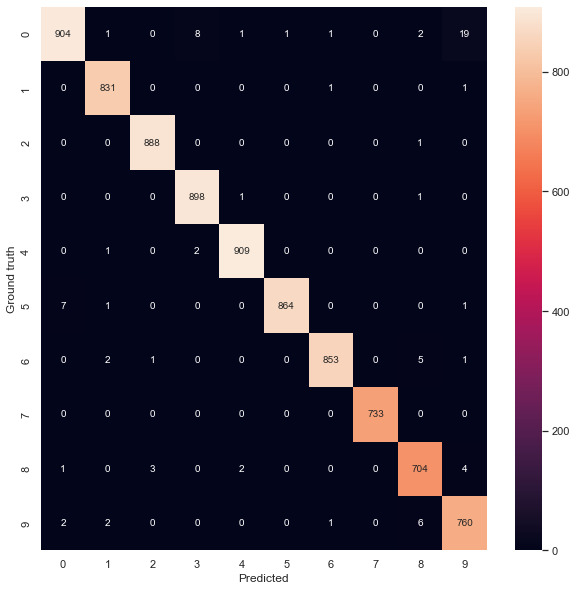

In [77]:
dispConfusionMatrix(y_test, y_pred)

In [78]:
print(classification_report(df_test["class"].to_numpy().reshape(-1,),
                           df_test["pred_class"].to_numpy().reshape(-1,)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       937
           1       0.99      1.00      0.99       833
           2       1.00      1.00      1.00       889
           3       0.99      1.00      0.99       900
           4       1.00      1.00      1.00       912
           5       1.00      0.99      0.99       873
           6       1.00      0.99      0.99       862
           7       1.00      1.00      1.00       733
           8       0.98      0.99      0.98       714
           9       0.97      0.99      0.98       771

    accuracy                           0.99      8424
   macro avg       0.99      0.99      0.99      8424
weighted avg       0.99      0.99      0.99      8424



In [81]:
np.where(df_test["class"]!=df_test["pred_class"])[0] 
#틀린 것들의 인덱스만 (튜플)

array([ 121,  182,  255,  288,  507,  817,  836,  856,  872,  882, 1068,
       1109, 1234, 1245, 1267, 1384, 1581, 1610, 1621, 2004, 2118, 2176,
       2562, 2638, 2696, 2804, 2876, 2885, 2908, 2962, 2988, 3092, 3111,
       3269, 3426, 3467, 3594, 3747, 3811, 4015, 4125, 4163, 4217, 4263,
       4407, 4433, 4452, 4461, 4562, 4680, 5404, 5452, 5500, 5569, 5582,
       5784, 5795, 6141, 6352, 6422, 6585, 6821, 6856, 6868, 6899, 7059,
       7128, 7421, 7434, 7490, 7818, 7842, 7850, 7894, 8019, 8039, 8108,
       8142, 8243, 8392], dtype=int64)

In [82]:
indices= np.where(df_test["class"]!=df_test["pred_class"])[0] 
df_test.iloc[indices].head(20)

subject classname                                         img  class  \
9336     p035        c0  d:/Ai/project1/imgs/train/c0/img_20144.jpg      0   
16190    p051        c9  d:/Ai/project1/imgs/train/c9/img_65500.jpg      9   
22345    p081        c9  d:/Ai/project1/imgs/train/c9/img_87534.jpg      9   
4511     p021        c0  d:/Ai/project1/imgs/train/c0/img_79819.jpg      0   
17781    p061        c0  d:/Ai/project1/imgs/train/c0/img_59737.jpg      0   
18188    p061        c5  d:/Ai/project1/imgs/train/c5/img_46472.jpg      5   
21211    p075        c5  d:/Ai/project1/imgs/train/c5/img_12442.jpg      5   
17823    p061        c0  d:/Ai/project1/imgs/train/c0/img_10307.jpg      0   
20       p002        c0  d:/Ai/project1/imgs/train/c0/img_66355.jpg      0   
1865     p014        c3   d:/Ai/project1/imgs/train/c3/img_4483.jpg      3   
15368    p051        c0  d:/Ai/project1/imgs/train/c0/img_99846.jpg      0   
18669    p064        c0  d:/Ai/project1/imgs/train/c0/img_86168.jpg      0   
19336    p064        c9  d:/Ai/project1/imgs/train/c9/img_87536.jpg      9   
17796    p061        c0  d:/Ai/project1/imgs/train/c0/img_16990.jpg      0   
15356    p051        c0  d:/Ai/project1/imgs/train/c0/img_89653.jpg      0   
15229    p050        c8  d:/Ai/project1/imgs/train/c8/img_29627.jpg      8   
5046     p021        c5  d:/Ai/project1/imgs/train/c5/img_57081.jpg      5   
16150    p051        c8  d:/Ai/project1/imgs/train/c8/img_61434.jpg      8   
17797    p061        c0  d:/Ai/project1/imgs/train/c0/img_32707.jpg      0   
20503    p072        c0  d:/Ai/project1/imgs/train/c0/img_29005.jpg      0   

       pred_class  pred_prob  
9336            9   0.558121  
16190           0   0.513325  
22345           8   0.689542  
4511            1   0.970095  
17781           9   0.698229  
18188           0   0.433035  
21211           0   0.525289  
17823           9   0.605675  
20              6   0.539193  
1865            8   0.528770  
15368           9   0.836145  
18669           9   0.548605  
19336           8   0.585014  
17796           3   0.815738  
15356           9   0.864217  
15229           9   0.884912  
5046            0   0.790629  
16150           2   0.584561  
17797           3   0.760624  
20503           3   0.584913

영상수:  8424  오답수:  80


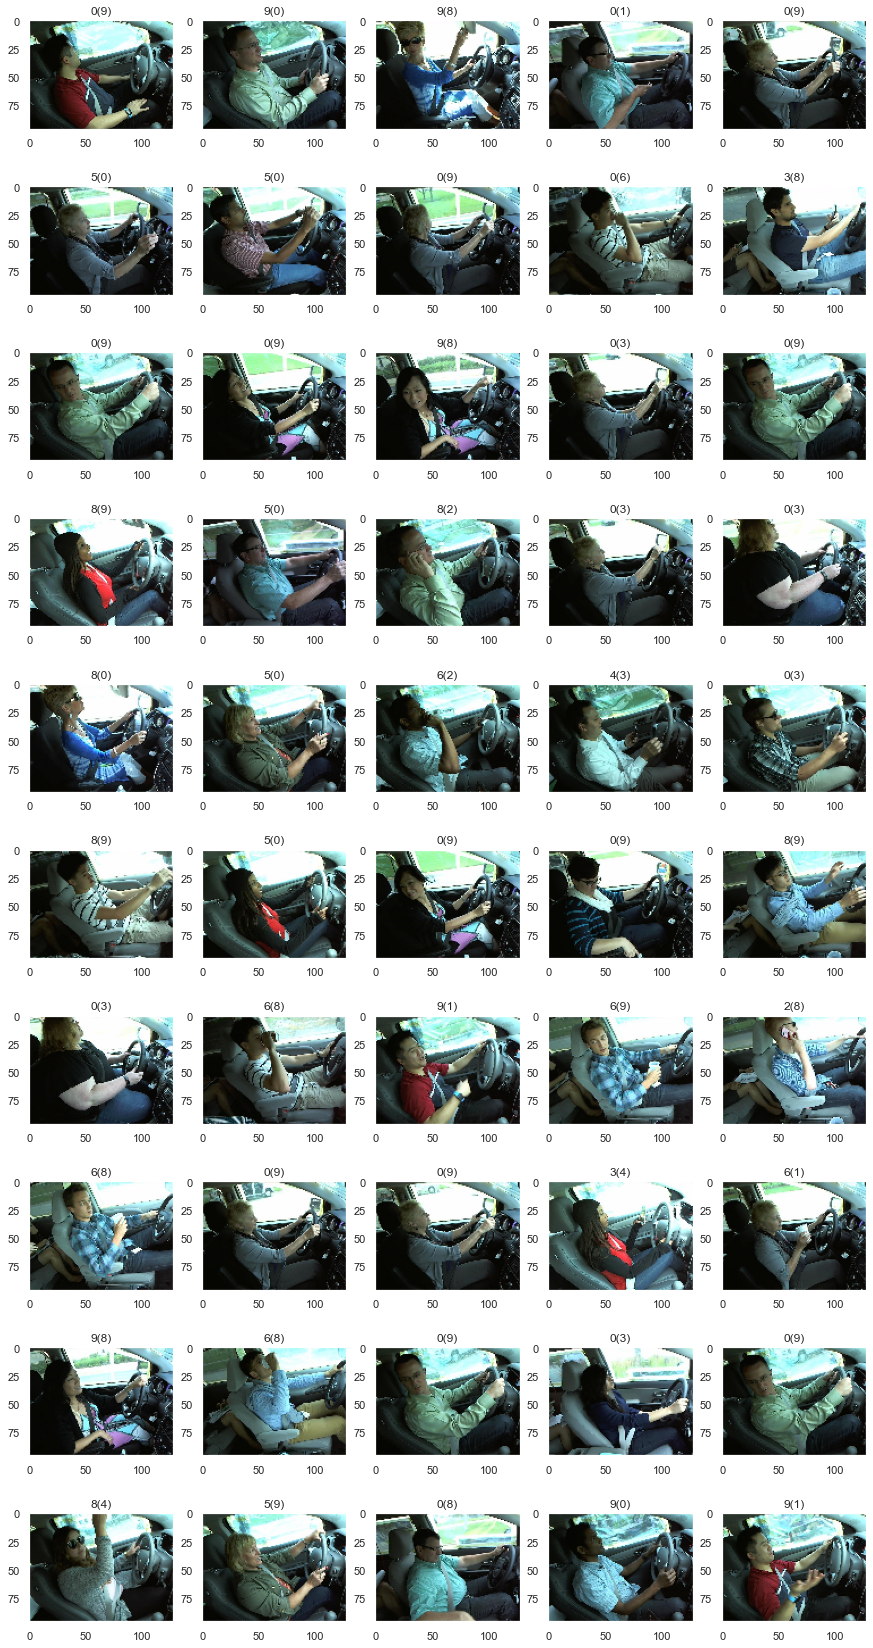

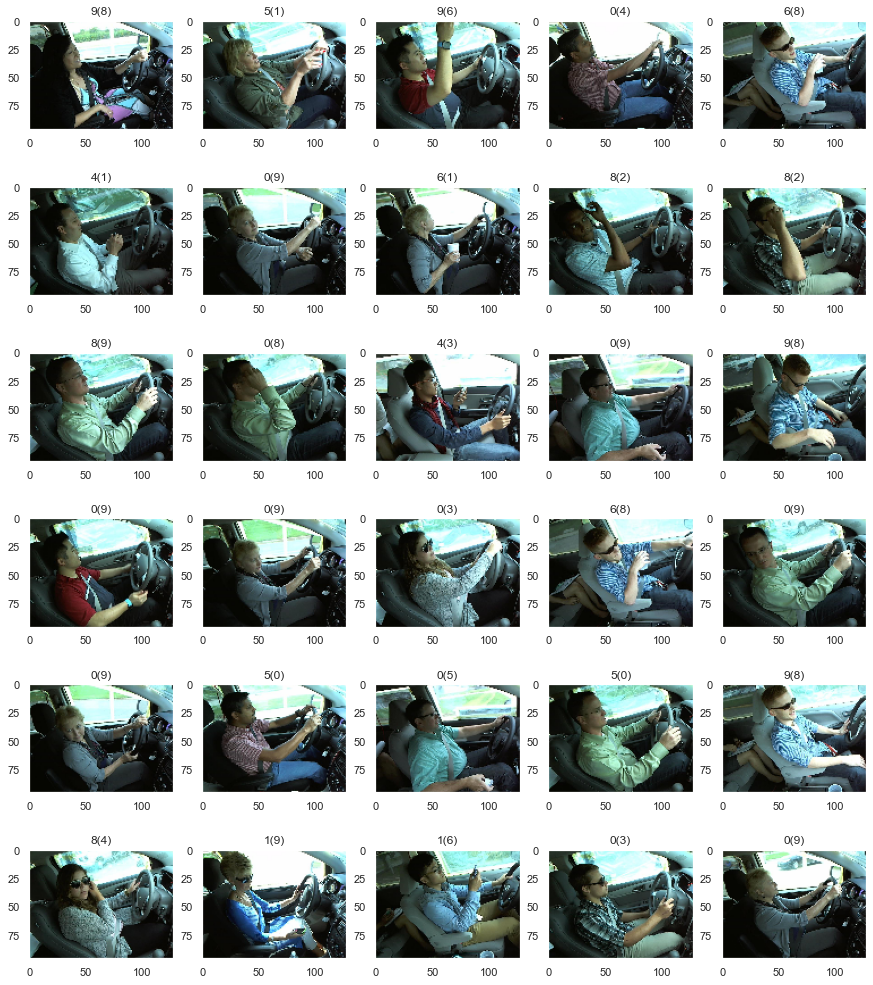

<Figure size 1080x2160 with 0 Axes>

<Figure size 1080x2160 with 0 Axes>

<Figure size 1080x2160 with 0 Axes>

In [93]:
skip=50
print("영상수: ",len(df_test), " 오답수: ", len(indices) )
for k in range(5):
    skip = 50*k
    plt.figure(figsize=(15, 30))
    #plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    for i, idx in enumerate(indices[skip: skip+50]):
        path=df_test.iloc[idx,2]
        plt.subplot(10, 5, i+1)
        view_image = plt.imread(path) 
        view_image = cv2.resize(view_image, (128, 96))
        plt.imshow(view_image)
        plt.xticks=([])
        plt.yticks=([])
        plt.grid(False)
        plt.title(str(df_test.iloc[idx, 3])+ '(' +str(df_test.iloc[idx,4])+')')
    plt.show()